<h1><center>CSCI - 6409 - The Process of Data Science - Fall 2022</h1></center>
<h1><center>Fraud Detection in Healthcare Insurance Claims</h1></center>

<b>Group 09:</b> 

Meagan Sinclair : 
B00737317

Ashpak Rakeeb Mohammad :
B00913796 

Shravya Reddy Gennepally :
B00911193
 

Sri Ramya Basam :
B00900307

Venkata Vijaya Mandapati :
B00912916

####Business understanding

Business Problem : The Problem Statement we are trying to solve is to predict the likely fraudulent insurance claims based on the kind of claims
submitted. Inpatient, outpatient, and beneficiary details data sets are taken into consideration to do
this. We have the data of all the patients that were admitted in Hospital and information regarding their insurance claims, reimbursed amount, physician details and insurance Provider details. With the use of the data sets we will also learn crucial parameters useful in identifying the behavior
of potentially fraudulent providers.

#### ABT
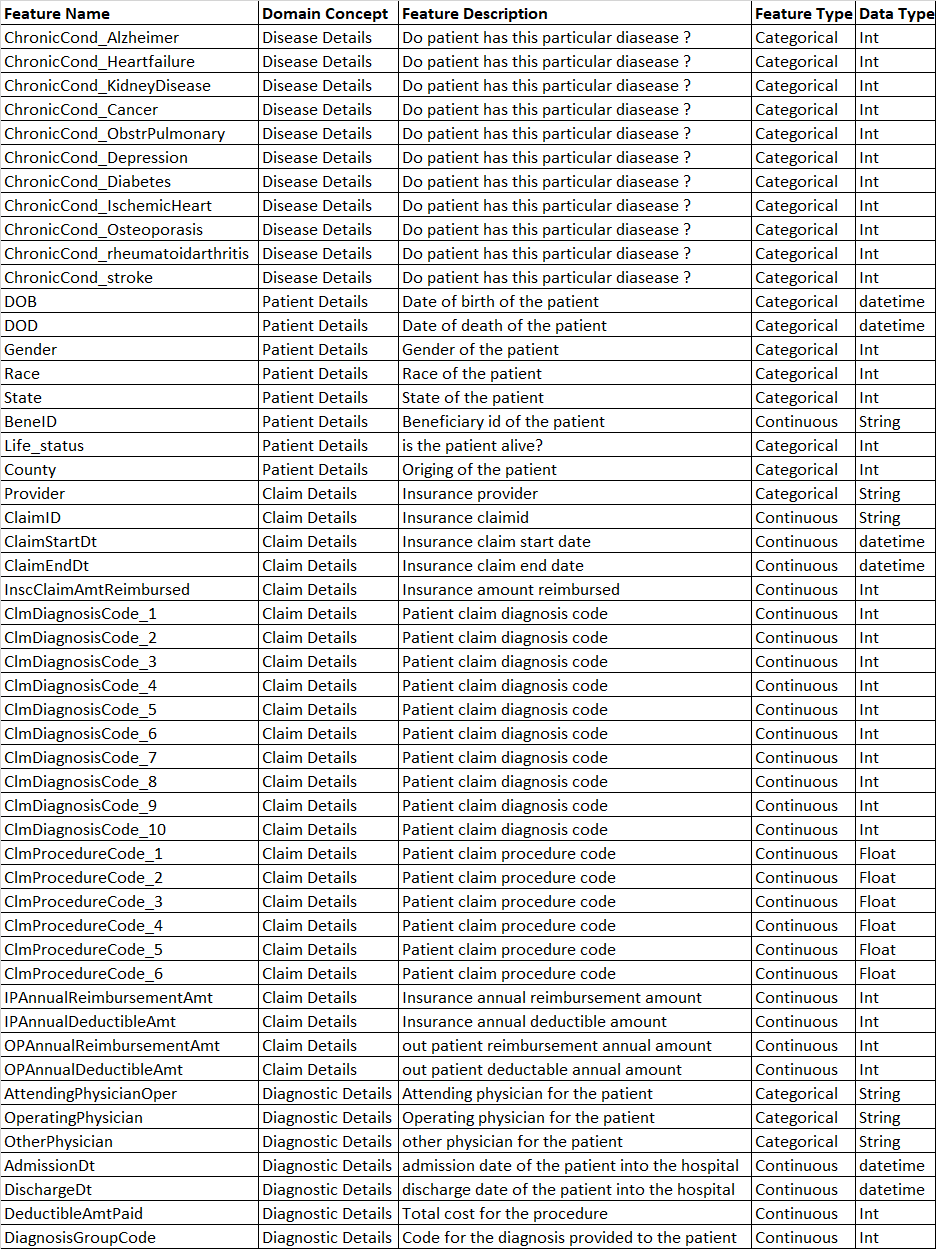


####Data Exploration

In [ ]:
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading all data

In [ ]:
# providers and whether they are potentially fraudulent 
train = pd.read_csv("/content/drive/MyDrive/proj_data/Train-1542865627584.csv")
# data on each beneficiary (patient)
train_beneficiary = pd.read_csv("/content/drive/MyDrive/proj_data/Train_Beneficiarydata-1542865627584.csv")
# data on inpatients
train_inpatient = pd.read_csv("/content/drive/MyDrive/proj_data/Train_Inpatientdata-1542865627584.csv")
# data on outpatients 
train_outpatient = pd.read_csv("/content/drive/MyDrive/proj_data/Train_Outpatientdata-1542865627584.csv")

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/proj_data/Test-1542969243754.csv")
test_beneficiary = pd.read_csv("/content/drive/MyDrive/proj_data/Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv("/content/drive/MyDrive/proj_data/Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv("/content/drive/MyDrive/proj_data/Test_Outpatientdata-1542969243754.csv")

In [ ]:
train_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [ ]:
train_datasets = [train,train_beneficiary,train_inpatient,train_outpatient]
for i in train_datasets:
  print(i.shape)
  print('----------------------------------')

(5410, 2)
----------------------------------
(138556, 25)
----------------------------------
(40474, 30)
----------------------------------
(517737, 27)
----------------------------------


Train data and Test data Understanding

In [ ]:
train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


Converting Object data type to Actual data types

In [ ]:
train = train.convert_dtypes()

In [ ]:
test.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provider  1353 non-null   object
dtypes: object(1)
memory usage: 10.7+ KB


In [ ]:
test = test.convert_dtypes()

Beneficiary Data Understanding

In [ ]:
train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
train_beneficiary.describe(include=['number'])

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [ ]:
train_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [ ]:
test_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [ ]:
test_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63968 entries, 0 to 63967
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   BeneID                           63968 non-null  object
 1   DOB                              63968 non-null  object
 2   DOD                              574 non-null    object
 3   Gender                           63968 non-null  int64 
 4   Race                             63968 non-null  int64 
 5   RenalDiseaseIndicator            63968 non-null  object
 6   State                            63968 non-null  int64 
 7   County                           63968 non-null  int64 
 8   NoOfMonths_PartACov              63968 non-null  int64 
 9   NoOfMonths_PartBCov              63968 non-null  int64 
 10  ChronicCond_Alzheimer            63968 non-null  int64 
 11  ChronicCond_Heartfailure         63968 non-null  int64 
 12  ChronicCond_KidneyDisease       

In [ ]:
# code source: in-class tutorial 
def build_continuous_features_report(data_df):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [ ]:
# code source: in-class tutorial 
def build_categorical_features_report(data_df):

    """Build tabular report for categorical features"""
    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
    }

    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    continuous_data_df = data_df[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df
def mode(df):
    return df.apply(lambda ft: ft.mode().to_list())

def mode_freq(df):
    return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

def second_mode(df):
    return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

def second_mode_freq(df):
    return df.apply(
        lambda ft: ft[~ft.isin(ft.mode())]
        .value_counts()[ft[~ft.isin(ft.mode())].mode()]
        .sum())
def mode_percentage(df):
    return mode_freq(df)/len(df)*100
def sec_mode_percentage(df):
    return second_mode_freq(df)/len(df)*100

Continuous and Categorical data reports for all the data sets

In [ ]:
build_continuous_features_report(train_beneficiary)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Gender,138556,0.0,2,1,1.0,1.570932,2.0,2.0,2,0.494945
Race,138556,0.0,4,1,1.0,1.254511,1.0,1.0,5,0.717007
State,138556,0.0,52,1,11.0,25.666734,25.0,39.0,54,15.223443
County,138556,0.0,314,0,141.0,374.424745,340.0,570.0,999,266.277581
NoOfMonths_PartACov,138556,0.0,13,0,12.0,11.907727,12.0,12.0,12,1.032332
NoOfMonths_PartBCov,138556,0.0,13,0,12.0,11.910145,12.0,12.0,12,0.936893
ChronicCond_Alzheimer,138556,0.0,2,1,1.0,1.667817,2.0,2.0,2,0.470998
ChronicCond_Heartfailure,138556,0.0,2,1,1.0,1.506322,2.0,2.0,2,0.499962
ChronicCond_KidneyDisease,138556,0.0,2,1,1.0,1.687643,2.0,2.0,2,0.463456
ChronicCond_Cancer,138556,0.0,2,1,2.0,1.880041,2.0,2.0,2,0.324914


In [ ]:
cat_report = build_categorical_features_report(train_beneficiary)
cat_report['Mode']= mode(train_beneficiary).T
cat_report['Mode Freq'] = mode_freq(train_beneficiary)
cat_report['Mode %']=  mode_percentage(train_beneficiary)
cat_report['2nd Mode'] = second_mode(train_beneficiary).T
cat_report['2nd Mode Freq'] = second_mode_freq(train_beneficiary)
cat_report['2nd Mode %']=  sec_mode_percentage(train_beneficiary)
cat_report

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
BeneID,138556,0.000000,138556,"[BENE100000, BENE100001, BENE100002, BENE10000...",138556,100.000000,[],0,0.000000
DOB,138556,0.000000,900,[1939-10-01],540,0.389734,[1941-10-01],538,0.388291
DOD,138556,98.974422,11,[2009-12-01],182,0.131355,[2009-10-01],168,0.121251
RenalDiseaseIndicator,138556,0.000000,2,[0],118978,85.869973,[Y],19578,14.130027


In [ ]:
build_continuous_features_report(test_beneficiary)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Gender,63968,0.0,2,1,1.0,1.574053,2.0,2.0,2,0.494490
Race,63968,0.0,4,1,1.0,1.250219,1.0,1.0,5,0.710366
State,63968,0.0,52,1,12.0,26.298681,26.0,39.0,54,14.954124
County,63968,0.0,285,0,140.0,368.597893,330.0,560.0,999,270.243676
NoOfMonths_PartACov,63968,0.0,12,0,12.0,11.918850,12.0,12.0,12,0.967169
NoOfMonths_PartBCov,63968,0.0,13,0,12.0,11.928152,12.0,12.0,12,0.841754
ChronicCond_Alzheimer,63968,0.0,2,1,1.0,1.632566,2.0,2.0,2,0.482110
ChronicCond_Heartfailure,63968,0.0,2,1,1.0,1.457447,1.0,2.0,2,0.498190
ChronicCond_KidneyDisease,63968,0.0,2,1,1.0,1.639101,2.0,2.0,2,0.480265
ChronicCond_Cancer,63968,0.0,2,1,2.0,1.862556,2.0,2.0,2,0.344318


In [ ]:
cat_report = build_categorical_features_report(test_beneficiary)
cat_report['Mode']= mode(test_beneficiary).T
cat_report['Mode Freq'] = mode_freq(test_beneficiary)
cat_report['Mode %']=  mode_percentage(test_beneficiary)
cat_report['2nd Mode'] = second_mode(test_beneficiary).T
cat_report['2nd Mode Freq'] = second_mode_freq(test_beneficiary)
cat_report['2nd Mode %']=  sec_mode_percentage(test_beneficiary)
cat_report 


,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
BeneID,63968,0.000000,63968,"[BENE100001, BENE100002, BENE100004, BENE10001...",63968,100.000000,[],0,0.000000
DOB,63968,0.000000,900,[1940-03-01],265,0.414270,[1942-03-01],244,0.381441
DOD,63968,99.102676,12,[2009-12-01],92,0.143822,[2009-08-01],74,0.115683
RenalDiseaseIndicator,63968,0.000000,2,[0],53408,83.491746,[Y],10560,16.508254


Replacing Y with 1 in RenalDiseaseIndicator (1 indicates Yes and 0 Indicates No) and Replacing 2 with 0 in Chronic Columns (1 indicates Yes and 0 indicates No) 

In [ ]:
train_beneficiary = train_beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)
train_beneficiary = train_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)
test_beneficiary = test_beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)
test_beneficiary = test_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

In [ ]:
train_beneficiary = train_beneficiary.convert_dtypes()
test_beneficiary = test_beneficiary.convert_dtypes()

In [ ]:
train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,<NA>,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,<NA>,2,1,0,39,280,12,12,...,0,0,0,0,0,0,0,0,30,50
2,BENE11003,1936-08-01,<NA>,1,1,0,52,590,12,12,...,0,0,1,0,0,0,0,0,90,40
3,BENE11004,1922-07-01,<NA>,1,1,0,39,270,12,12,...,0,1,1,1,1,0,0,0,1810,760
4,BENE11005,1935-09-01,<NA>,1,1,0,24,680,12,12,...,0,1,0,0,0,0,0,0,1790,1200


We have two columns DOB and DOD which can be used to generate a new field AGE that helps in our process.

**Calculating AGE of patients**

In [ ]:
train_beneficiary['DOB'] = pd.to_datetime(train_beneficiary['DOB'] , format = '%Y-%m-%d')
train_beneficiary['DOD'] = pd.to_datetime(train_beneficiary['DOD'],format = '%Y-%m-%d',errors='ignore')

test_beneficiary['DOB'] = pd.to_datetime(test_beneficiary['DOB'] , format = '%Y-%m-%d')
test_beneficiary['DOD'] = pd.to_datetime(test_beneficiary['DOD'],format = '%Y-%m-%d',errors='ignore')

We have null values in Date of death column and calculating age would result in more null/na values. Hence we first we observe other data sets and identify when the last data was recorded. And we use that value to calculate Age.

In [ ]:
print("Max value of Date of death",train_beneficiary['DOD'].max(),
      test_beneficiary['DOD'].max(),
      "Max value of Date of birth",train_beneficiary['DOB'].max(),
      test_beneficiary['DOB'].max(),
      "Max value of Claim end date",train_inpatient.ClaimEndDt.max(),
      test_inpatient.ClaimEndDt.max(),
      train_outpatient.ClaimEndDt.max(),
      test_outpatient.ClaimEndDt.max(),sep='\n')

Max value of Date of death
2009-12-01 00:00:00
2009-12-01 00:00:00
Max value of Date of birth
1983-12-01 00:00:00
1983-12-01 00:00:00
Max value of Claim end date
2009-12-31
2009-12-31
2009-12-31
2009-12-31


As we can see the records are last recorded on 12/31/2009 and last Date of death(DOD) recorded is on '12/01/2009' we fill the rest null values columns with the last date of records that are considered(i.e 12/31/2009), but to distinguish between dead and alive patients we introduce a new column "life_status" (0 indicates alive , 1 indicates dead)

In [ ]:
train_beneficiary.loc[train_beneficiary['DOD'].isna(),'Life_status']=0
train_beneficiary.loc[train_beneficiary['DOD'].notna(),'Life_status']=1

test_beneficiary.loc[test_beneficiary['DOD'].isna(),'Life_status']=0
test_beneficiary.loc[test_beneficiary['DOD'].notna(),'Life_status']=1

In [ ]:
train_beneficiary['Age'] = round(((train_beneficiary['DOD'] - train_beneficiary['DOB']).dt.days)/365)
train_beneficiary.Age.fillna(round(((pd.to_datetime('12-31-2009' , format = '%m-%d-%Y') - train_beneficiary['DOB']).dt.days)/365),inplace=True)

test_beneficiary['Age'] = round(((test_beneficiary['DOD'] - test_beneficiary['DOB']).dt.days)/365)
test_beneficiary.Age.fillna(round(((pd.to_datetime('12-31-2009' , format = '%m-%d-%Y') - test_beneficiary['DOB']).dt.days)/365),inplace=True)

In [ ]:
train_beneficiary[['Age','Life_status']].head()

,Age,Life_status
0,67.0,0.0
1,73.0,0.0
2,73.0,0.0
3,88.0,0.0
4,74.0,0.0


Inpatient and Outpatient Data Understanding

In [ ]:
train_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [ ]:
train_inpatient = train_inpatient.convert_dtypes()
test_inpatient = test_inpatient.convert_dtypes()

In [ ]:
train_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   BeneID                  40474 non-null  string
 1   ClaimID                 40474 non-null  string
 2   ClaimStartDt            40474 non-null  string
 3   ClaimEndDt              40474 non-null  string
 4   Provider                40474 non-null  string
 5   InscClaimAmtReimbursed  40474 non-null  Int64 
 6   AttendingPhysician      40362 non-null  string
 7   OperatingPhysician      23830 non-null  string
 8   OtherPhysician          4690 non-null   string
 9   AdmissionDt             40474 non-null  string
 10  ClmAdmitDiagnosisCode   40474 non-null  string
 11  DeductibleAmtPaid       39575 non-null  Int64 
 12  DischargeDt             40474 non-null  string
 13  DiagnosisGroupCode      40474 non-null  string
 14  ClmDiagnosisCode_1      40474 non-null  string
 15  Cl

In [ ]:
train_inpatient.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,<NA>
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,<NA>
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,<NA>
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,<NA>
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,<NA>
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,<NA>
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,<NA>


In [ ]:
build_continuous_features_report(train_inpatient)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
InscClaimAmtReimbursed,40474,0.000000,146,0,4000.0,10087.884074,7000.0,12000.0,125000,10303.099402
DeductibleAmtPaid,40474,2.221179,1,1068,1068.0,1068.0,1068.0,1068.0,1068,0.0
ClmProcedureCode_1,40474,42.807728,1117,11,3848.0,5894.611759,5369.0,8666.25,9999,3049.3044
ClmProcedureCode_2,40474,86.524683,297,42,2724.0,4103.738174,4019.0,4439.0,9999,2028.182156
ClmProcedureCode_3,40474,97.615753,154,42,2724.0,4226.35544,4019.0,5185.0,9999,2282.761581
ClmProcedureCode_4,40474,99.713396,48,42,2758.75,4070.172414,4019.0,4439.0,9986,1994.409802
ClmProcedureCode_5,40474,99.977764,6,2724,4139.0,5269.444444,4139.0,5185.0,9982,2780.071632
ClmProcedureCode_6,40474,100.000000,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
cat_report = build_categorical_features_report(train_inpatient)
cat_report['Mode']= mode(train_inpatient).T
cat_report['Mode Freq'] = mode_freq(train_inpatient)
cat_report['Mode %']=  mode_percentage(train_inpatient)
cat_report['2nd Mode'] = second_mode(train_inpatient).T
cat_report['2nd Mode Freq'] = second_mode_freq(train_inpatient)
cat_report['2nd Mode %']=  sec_mode_percentage(train_inpatient)
cat_report

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
BeneID,40474,0.000000,31289,[BENE134170],8,0.019766,"[BENE117116, BENE119457, BENE121796, BENE62091...",35,0.086475
ClaimID,40474,0.000000,40474,"[CLM31001, CLM31004, CLM31005, CLM31006, CLM31...",40474,100.000000,[],0,0.000000
ClaimStartDt,40474,0.000000,398,[2009-02-10],145,0.358255,[2009-02-26],144,0.355784
ClaimEndDt,40474,0.000000,365,[2009-02-11],153,0.378020,[2009-01-10],146,0.360725
Provider,40474,0.000000,2092,[PRV52019],516,1.274893,[PRV55462],386,0.953699
AttendingPhysician,40474,0.276721,11604,[PHY422134],386,0.953699,[PHY341560],274,0.676978
OperatingPhysician,40474,41.122696,8287,[PHY429430],225,0.555912,[PHY341560],153,0.378020
OtherPhysician,40474,88.412314,2877,[PHY416093],81,0.200128,[PHY333406],38,0.093887
AdmissionDt,40474,0.000000,398,[2009-02-10],144,0.355784,"[2009-01-31, 2009-02-26]",286,0.706626
ClmAdmitDiagnosisCode,40474,0.000000,1928,[78650],1731,4.276820,[78605],1669,4.123635


In [ ]:
build_continuous_features_report(test_inpatient)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
InscClaimAmtReimbursed,9551,0.000000,94,0,4000.0,10105.306251,7000.0,12000.0,125000,10316.862711
DeductibleAmtPaid,9551,2.052141,1,1068,1068.0,1068.0,1068.0,1068.0,1068,0.0
ClmProcedureCode_1,9551,43.115904,657,14,3891.0,5907.84631,5369.0,8741.0,9999,3055.573174
ClmProcedureCode_2,9551,86.870485,170,42,2749.0,4141.27193,4019.0,4439.0,9998,2047.600995
ClmProcedureCode_3,9551,97.665166,67,185,2724.0,4159.206278,4019.0,5119.0,9984,2158.192869
ClmProcedureCode_4,9551,99.696367,20,260,3320.0,4509.931034,4263.0,5781.0,9971,2571.379659
ClmProcedureCode_5,9551,99.979060,2,4139,5597.25,7055.5,7055.5,8513.75,9972,4124.553855
ClmProcedureCode_6,9551,100.000000,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
cat_report = build_categorical_features_report(test_inpatient)
cat_report['Mode']= mode(test_inpatient).T
cat_report['Mode Freq'] = mode_freq(test_inpatient)
cat_report['Mode %']=  mode_percentage(test_inpatient)
cat_report['2nd Mode'] = second_mode(test_inpatient).T
cat_report['2nd Mode Freq'] = second_mode_freq(test_inpatient)
cat_report['2nd Mode %']=  sec_mode_percentage(test_inpatient)
cat_report

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
BeneID,9551,0.000000,8351,"[BENE115325, BENE39898]",12,0.125641,"[BENE117702, BENE137036, BENE24688, BENE67334,...",25,0.261753
ClaimID,9551,0.000000,9551,"[CLM31002, CLM31003, CLM31011, CLM31012, CLM31...",9551,100.000000,[],0,0.000000
ClaimStartDt,9551,0.000000,392,[2009-02-01],40,0.418804,"[2009-02-20, 2009-04-10]",76,0.795728
ClaimEndDt,9551,0.000000,365,[2009-06-18],43,0.450215,"[2009-02-21, 2009-04-08]",82,0.858549
Provider,9551,0.000000,520,[PRV53866],604,6.323945,[PRV52618],345,3.612187
AttendingPhysician,9551,0.324573,2657,[PHY329480],301,3.151502,[PHY356825],299,3.130562
OperatingPhysician,9551,41.482567,1870,"[PHY350998, PHY356259]",340,3.559837,[PHY335869],139,1.455345
OtherPhysician,9551,89.393781,658,[PHY335869],38,0.397864,[PHY400576],21,0.219872
AdmissionDt,9551,0.000000,392,[2009-02-01],40,0.418804,"[2009-02-20, 2009-04-10]",76,0.795728
ClmAdmitDiagnosisCode,9551,0.000000,1113,[78605],397,4.156633,[78650],380,3.978641


As there are multiple dataframes holding data related to patient information, we merge all the data into a single dataframe and then perform the data cleaning.

In [ ]:
train_patient_data = pd.concat([train_inpatient,train_outpatient], axis=0, ignore_index=True)

In [ ]:
test_patient_data = pd.concat([test_inpatient,test_outpatient],axis=0,ignore_index=True)

In [ ]:
print("Shape of df after merging inpatient and outpatient train data ",train_patient_data.shape)
print("Shape of df after merging inpatient and outpatient test data ",test_patient_data.shape)

Shape of df after merging inpatient and outpatient train data  (558211, 30)
Shape of df after merging inpatient and outpatient test data  (135392, 30)


In [ ]:
train_patient_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

Merging Patient data and beneficiary data based on the column BeneID, this resulting dataframe holds all the inpatient,outpatient and beneficiary details of a patient

In [ ]:
train_patient_with_beneficiary = pd.merge(train_patient_data,train_beneficiary,on="BeneID",how='inner')
test_patient_final = pd.merge(test_patient_data,test_beneficiary,on="BeneID",how="inner")

In [ ]:
print("Shape of df after merging patient and beneficiary train data ",train_patient_with_beneficiary.shape)
print("Shape of df after merging patient and beneficiary test data ",test_patient_final.shape)

Shape of df after merging patient and beneficiary train data  (558211, 56)
Shape of df after merging patient and beneficiary test data  (135392, 56)


In [ ]:
train_patient_with_beneficiary.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

Finally getting the Provider detail for each claim of the patient to categorize as fraud or not by merging it with the train data based on column "Provider"

In [ ]:
train_patient_final = pd.merge(train_patient_with_beneficiary,train,on="Provider",how="inner")

In [ ]:
print("Shape of df after merging all the train data ",train_patient_final.shape)

Shape of df after merging all the train data  (558211, 57)


In [ ]:
train_patient_final.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [ ]:
train_patient_final = train_patient_final.convert_dtypes()
og_df = train_patient_final

In [ ]:
train_patient_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 57 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  string        
 1   ClaimID                          558211 non-null  string        
 2   ClaimStartDt                     558211 non-null  string        
 3   ClaimEndDt                       558211 non-null  string        
 4   Provider                         558211 non-null  string        
 5   InscClaimAmtReimbursed           558211 non-null  Int64         
 6   AttendingPhysician               556703 non-null  string        
 7   OperatingPhysician               114447 non-null  string        
 8   OtherPhysician                   199736 non-null  string        
 9   AdmissionDt                      40474 non-null   string        
 10  ClmAdmitDiagnosisCode            145899 non-

Data Quality Report

In [ ]:
build_continuous_features_report(train_patient_final)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
InscClaimAmtReimbursed,558211,0.000000,438,0,40.0,997.012133,80.0,300.0,125000,3821.534891
DeductibleAmtPaid,558211,0.161050,17,0,0.0,78.421085,0.0,0.0,1068,274.016812
ClmProcedureCode_1,558211,95.824160,1117,11.0,3848.0,5896.154612,5363.0,8669.0,9999.0,3050.489933
ClmProcedureCode_2,558211,99.016501,300,42.0,2724.0,4106.358106,4019.0,4439.0,9999.0,2031.640878
ClmProcedureCode_3,558211,99.826410,154,42.0,2724.0,4221.123839,4019.0,5185.0,9999.0,2281.849885
ClmProcedureCode_4,558211,99.978861,48,42.0,2754.25,4070.262712,4019.0,4439.0,9986.0,2037.62699
ClmProcedureCode_5,558211,99.998388,6,2724,4139.0,5269.444444,4139.0,5185.0,9982,2780.071632
ClmProcedureCode_6,558211,100.000000,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Gender,558211,0.000000,2,1,1.0,1.578838,2.0,2.0,2,0.493746
Race,558211,0.000000,4,1,1.0,1.255011,1.0,1.0,5,0.717437


In [ ]:
cat_report = build_categorical_features_report(train_patient_final)
cat_report['Mode']= mode(train_patient_final).T
cat_report['Mode Freq'] = mode_freq(train_patient_final)
cat_report['Mode %']=  mode_percentage(train_patient_final)
cat_report['2nd Mode'] = second_mode(train_patient_final).T
cat_report['2nd Mode Freq'] = second_mode_freq(train_patient_final)
cat_report['2nd Mode %']=  sec_mode_percentage(train_patient_final)
cat_report

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
BeneID,558211,0.000000,138556,"[BENE118316, BENE42721, BENE59303]",87,0.015586,"[BENE36330, BENE44241, BENE80977]",84,0.015048
ClaimID,558211,0.000000,558211,"[CLM110011, CLM110012, CLM110013, CLM110014, C...",558211,100.000000,[],0,0.000000
ClaimStartDt,558211,0.000000,398,[2009-01-31],1709,0.306157,[2009-03-03],1706,0.305619
ClaimEndDt,558211,0.000000,366,[2009-03-03],1707,0.305798,[2009-02-11],1682,0.301320
Provider,558211,0.000000,5410,[PRV51459],8240,1.476144,[PRV53797],4739,0.848962
AttendingPhysician,558211,0.270149,82063,[PHY330576],2534,0.453950,[PHY350277],1628,0.291646
OperatingPhysician,558211,79.497538,35315,[PHY330576],424,0.075957,[PHY424897],293,0.052489
OtherPhysician,558211,64.218548,46457,[PHY412132],1247,0.223392,[PHY341578],1098,0.196700
AdmissionDt,558211,92.749337,398,[2009-02-10],144,0.025797,"[2009-01-31, 2009-02-26]",286,0.051235
ClmAdmitDiagnosisCode,558211,73.863109,4098,[V7612],4074,0.729832,[42731],3634,0.651008


In [ ]:
train_patient_final.PotentialFraud.value_counts()

No     345415
Yes    212796
Name: PotentialFraud, dtype: Int64

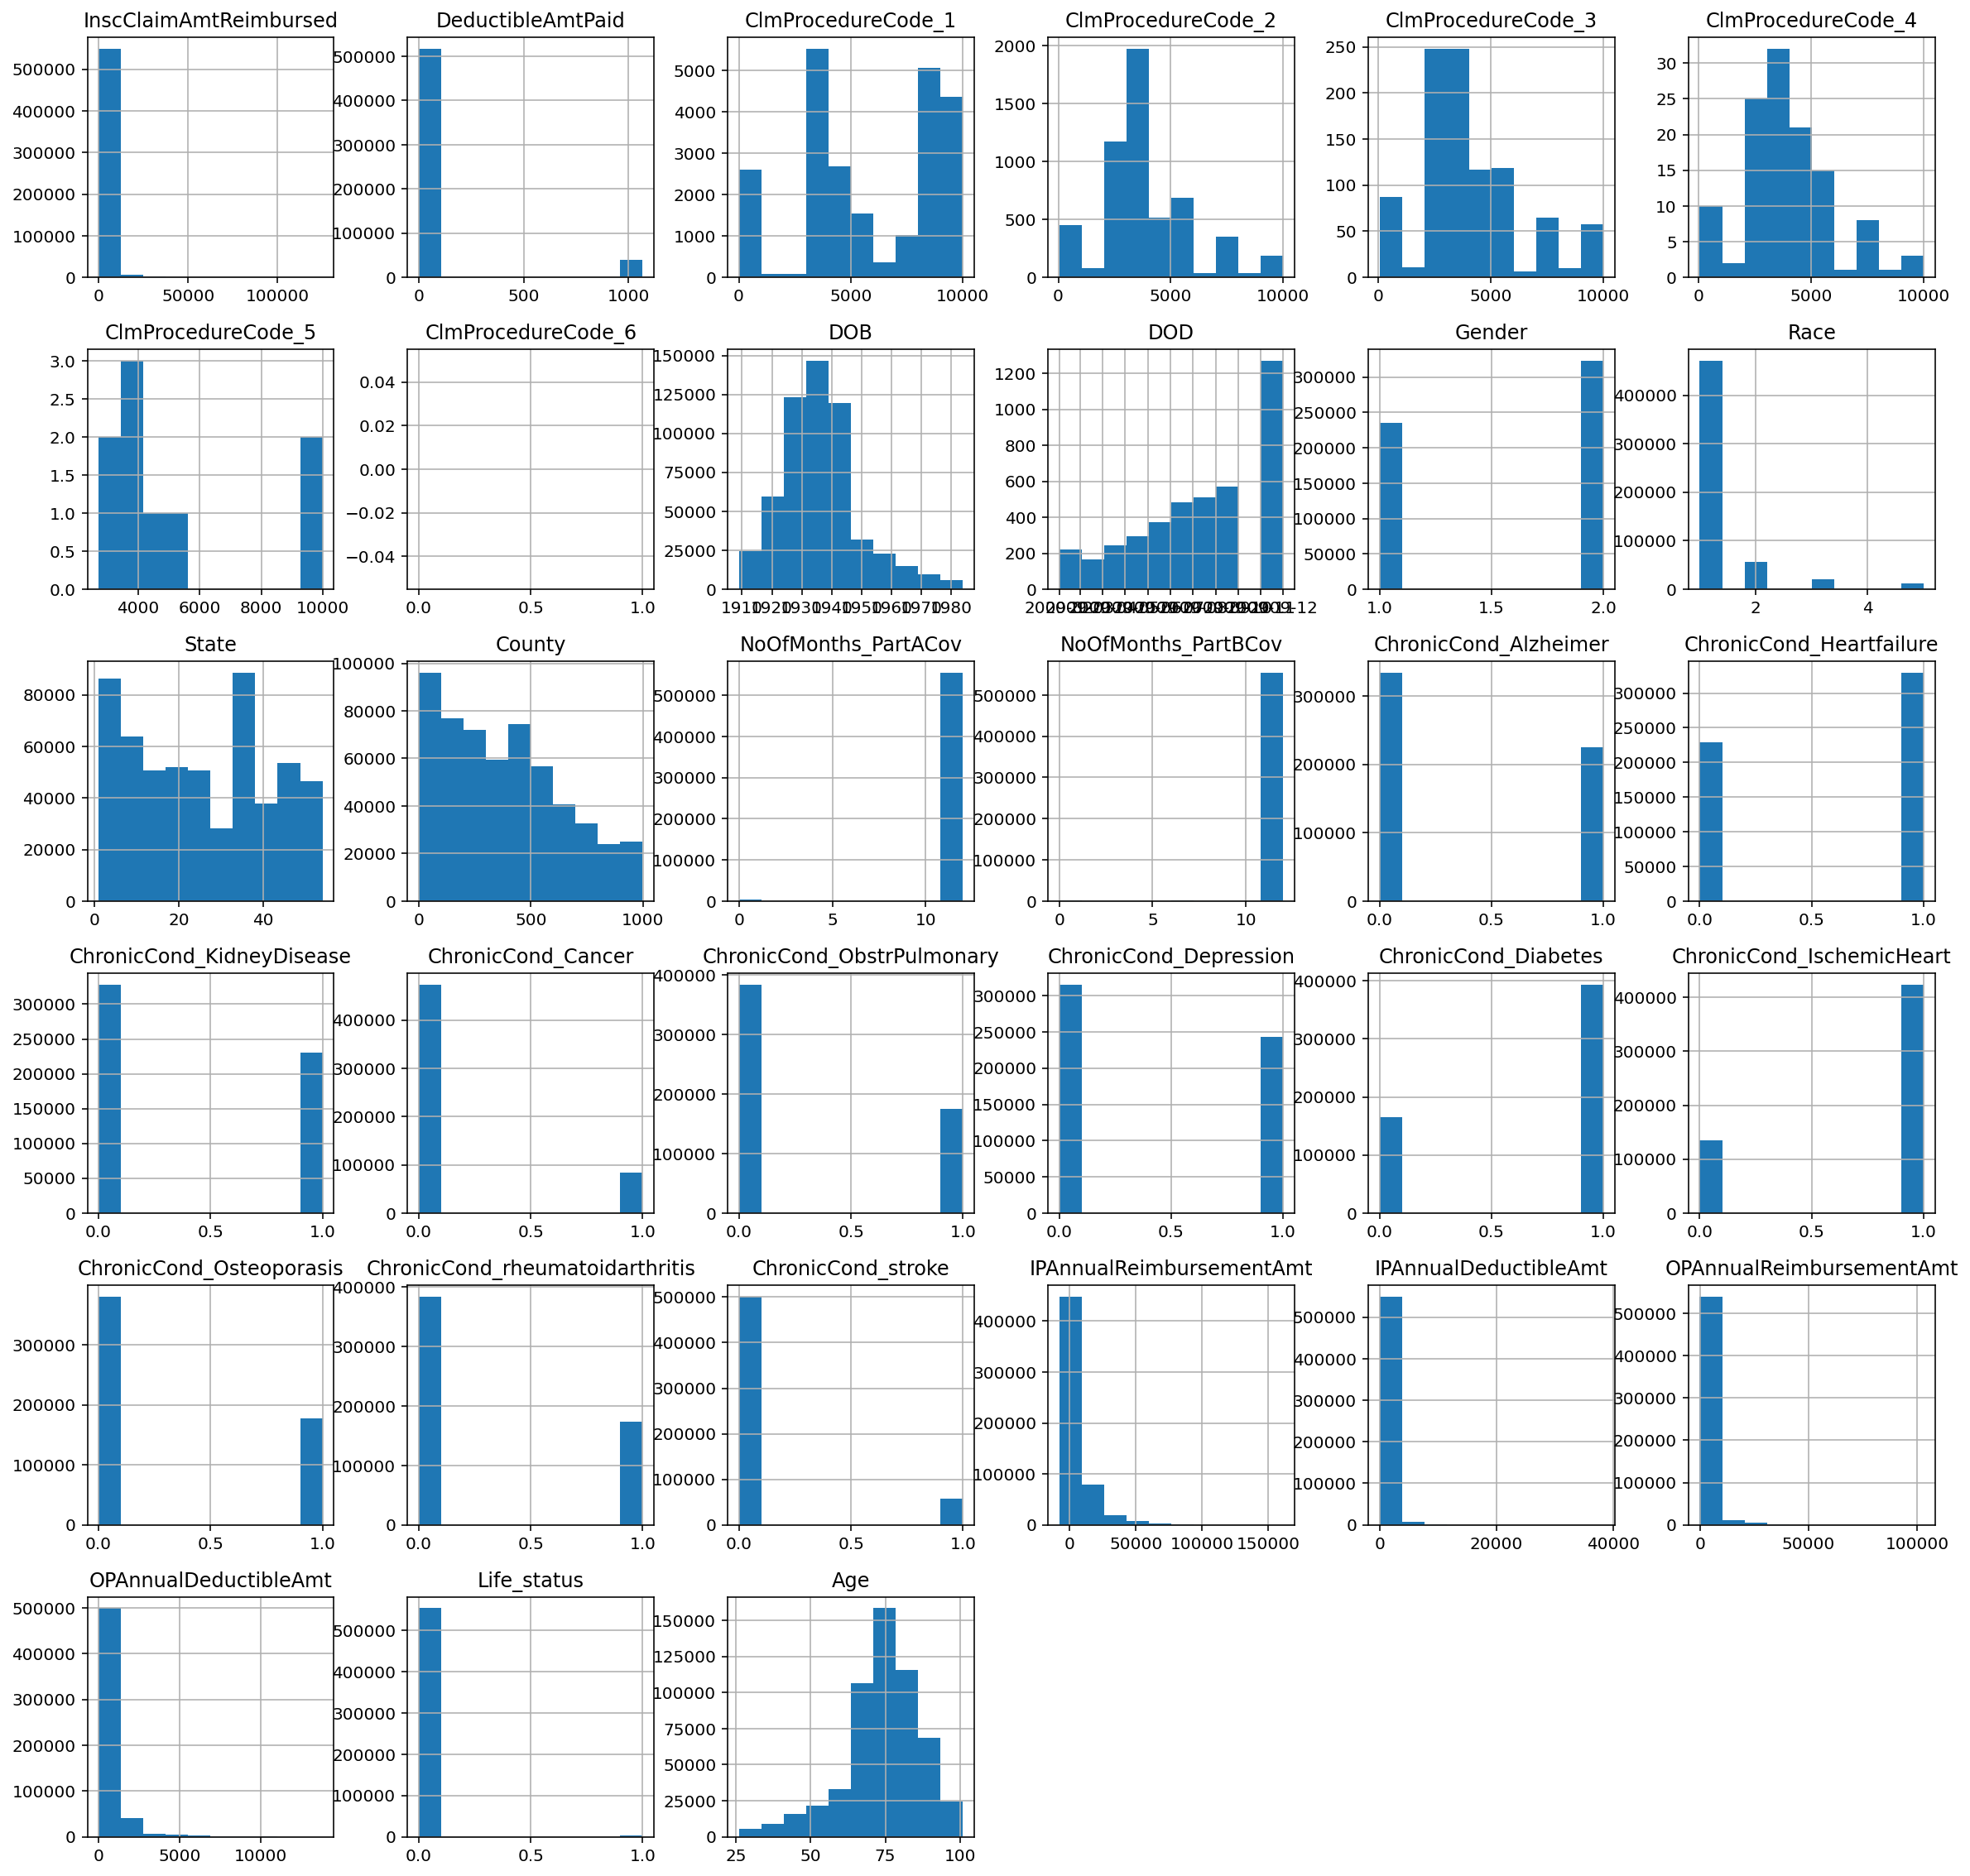

In [ ]:
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["font.size"] = 10
%config InlineBackend.figure_format = 'retina'
train_patient_final.hist()
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


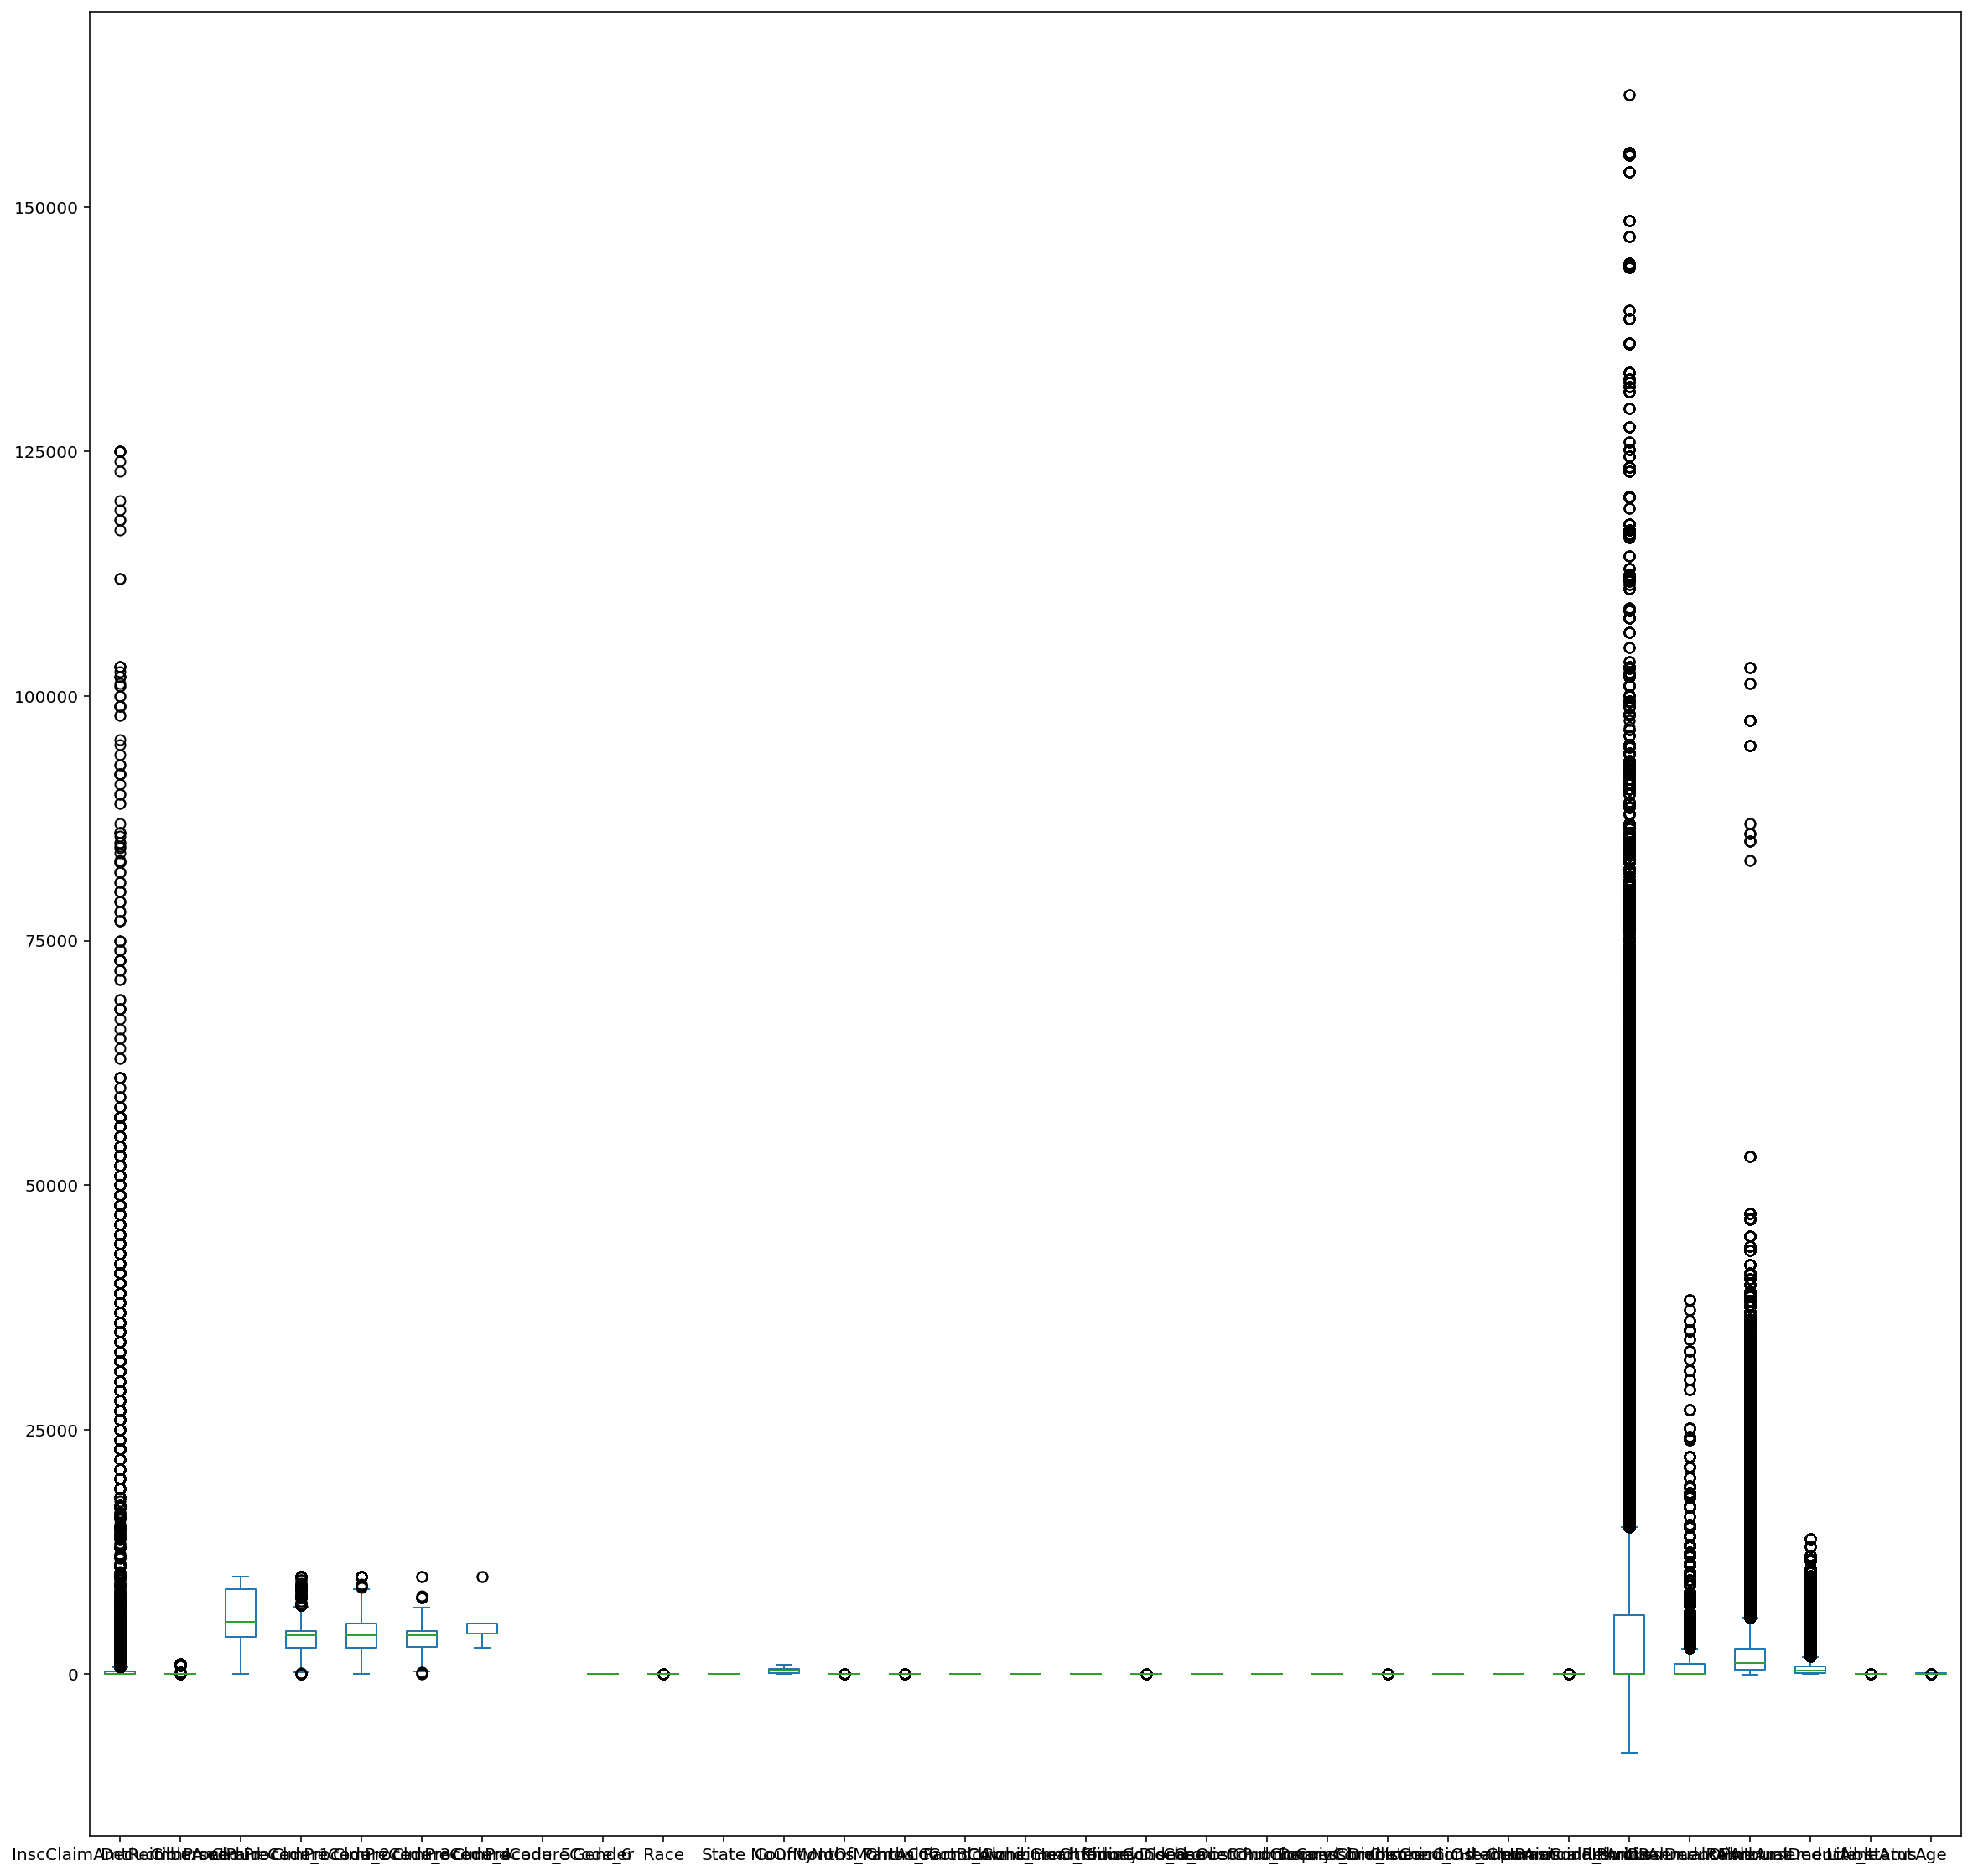

In [ ]:
train_patient_final.plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feefc3fd730>,
      dtype=object)

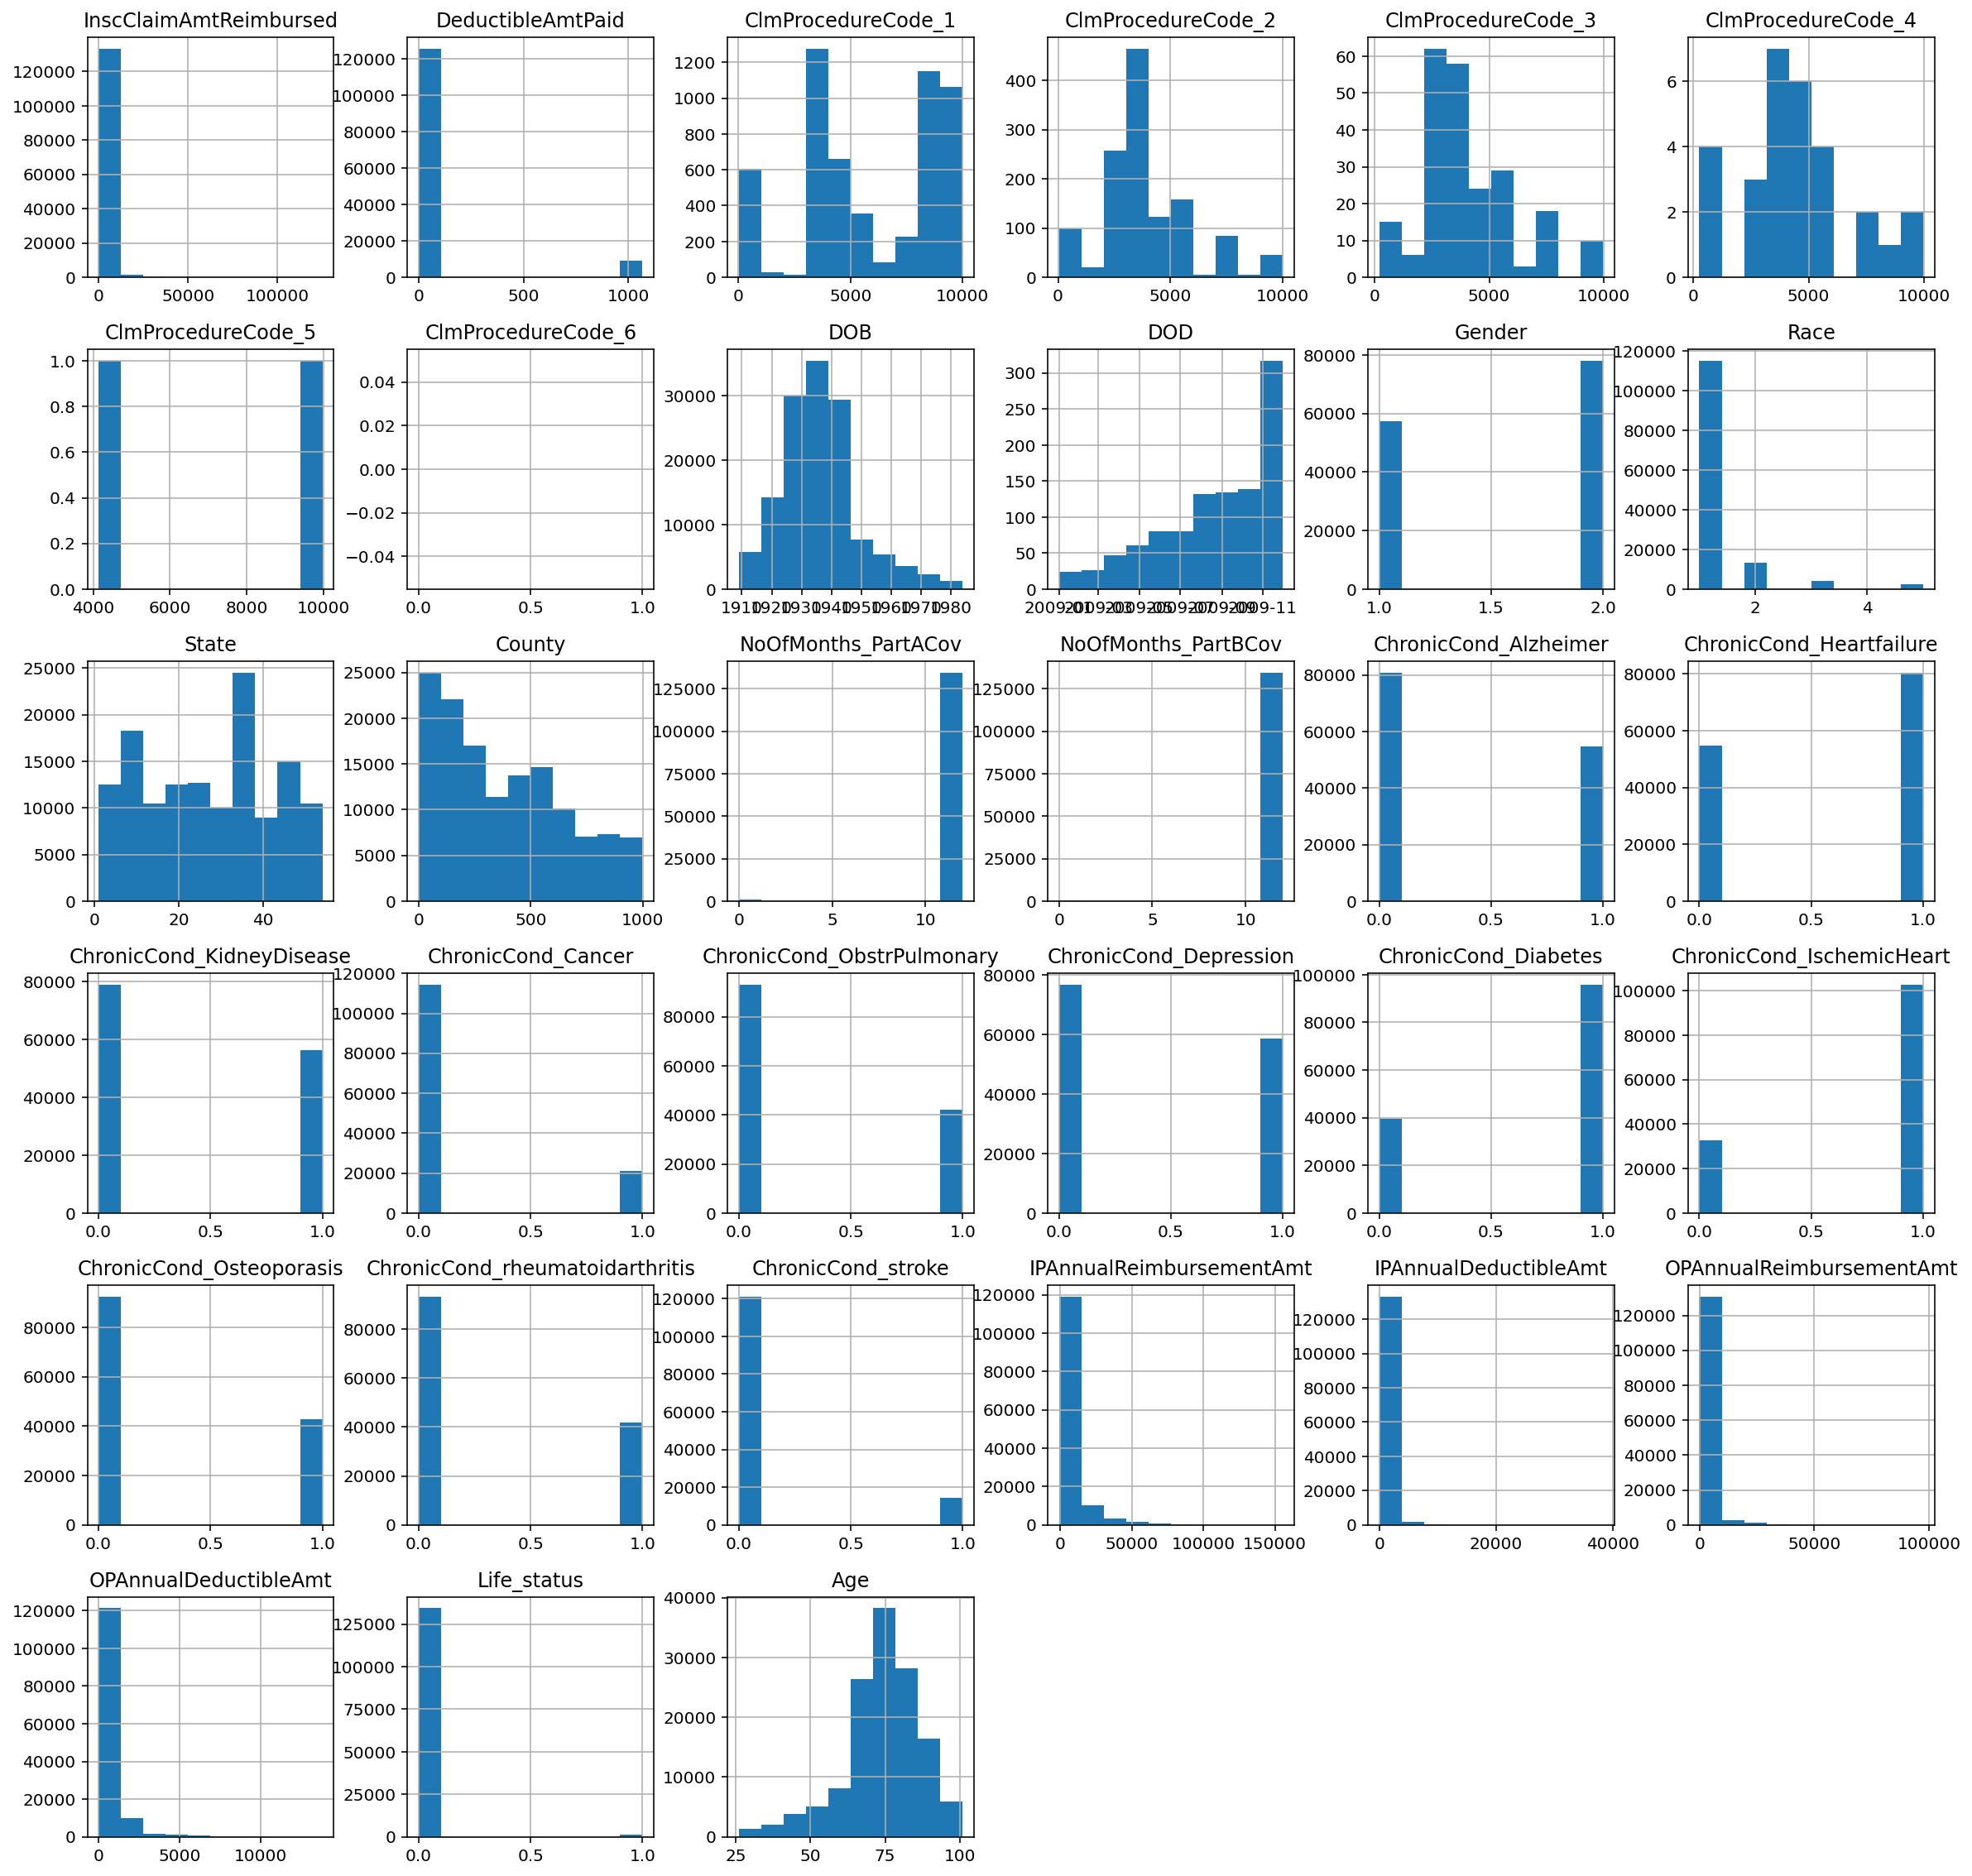

In [ ]:
test_patient_final.hist()

#### Data Quality Plan

In [ ]:
data_quality_plan_df = pd.DataFrame(index=og_df.columns, columns=["observations", "actions"], dtype="string")
data_quality_plan_df[:] =" "

In [ ]:
data_quality_plan_df['observations']['BeneID'] = "This column has no missing values"
data_quality_plan_df['observations']['ClaimID'] = "This column has no missing values"
data_quality_plan_df['observations']['ClaimStartDt'] = "This column has no missing values"
data_quality_plan_df['observations']['ClaimEndDt'] = "This column has no missing values"
data_quality_plan_df['observations']['Provider'] = "This column has no missing values"
data_quality_plan_df['observations']['InscClaimAmtReimbursed'] = "This column has no missing values"
data_quality_plan_df['observations']['AttendingPhysician'] = "This column has no missing values"
data_quality_plan_df['observations']['OperatingPhysician'] = "This column has no missing values"
data_quality_plan_df['observations']['OtherPhysician'] = "This column has no missing values"
data_quality_plan_df['observations']['AdmissionDt'] = "This column has no missing values"
data_quality_plan_df['observations']['ClmAdmitDiagnosisCode'] = "This column has no missing values"
data_quality_plan_df['observations']['DeductibleAmtPaid'] = "This column has no missing values"
data_quality_plan_df['observations']['DischargeDt'] = "This column has greater than 90% of missing values"
data_quality_plan_df['observations']['DiagnosisGroupCode'] = "This column has no missing values"
data_quality_plan_df['observations']['ClmDiagnosisCode_1'] = "This column has no missing values"
data_quality_plan_df['observations']['ClmDiagnosisCode_2'] = "This column has no missing values"
data_quality_plan_df['observations']['ClmDiagnosisCode_3'] = "This column has no missing values"
data_quality_plan_df['observations']['ClmDiagnosisCode_4'] = "This column has no missing values"
data_quality_plan_df['observations']['ClmDiagnosisCode_5'] = "This column has no missing values"
data_quality_plan_df['observations']['ClmDiagnosisCode_6'] = "This column has no missing values"
data_quality_plan_df['observations']['ClmDiagnosisCode_7'] = "This column has no missing values"
data_quality_plan_df['observations']['ClmDiagnosisCode_8'] = "This column has greater than 90% of missing values"
data_quality_plan_df['observations']['ClmDiagnosisCode_9'] = "This column has greater than 90% of missing values"
data_quality_plan_df['observations']['ClmDiagnosisCode_10'] = "This column has greater than 90% of missing values"
data_quality_plan_df['observations']['ClmProcedureCode_1'] = "This column has no missing values"
data_quality_plan_df['observations']['ClmProcedureCode_2'] = "This column has greater than 90% of missing values"
data_quality_plan_df['observations']['ClmProcedureCode_3'] = "This column has greater than 90% of missing values"
data_quality_plan_df['observations']['ClmProcedureCode_4'] = "This column has greater than 90% of missing values"
data_quality_plan_df['observations']['ClmProcedureCode_5'] = "This column has greater than 90% of missing values"
data_quality_plan_df['observations']['ClmProcedureCode_6'] = "This column has greater than 90% of missing values"
data_quality_plan_df['observations']['DOB'] = "This column has no missing values"
data_quality_plan_df['observations']['DOD'] = "This column has greater than 90% of missing values"
data_quality_plan_df['observations']['Gender'] = "This column has no missing values"
data_quality_plan_df['observations']['Race'] = "This column has no missing values"
data_quality_plan_df['observations']['RenalDiseaseIndicator'] = "This column has no missing values"
data_quality_plan_df['observations']['State'] = "This column has no missing values"
data_quality_plan_df['observations']['County'] = "This column has no missing values"
data_quality_plan_df['observations']['NoOfMonths_PartACov'] = "This column has no missing values"
data_quality_plan_df['observations']['NoOfMonths_PartBCov'] = "This column has no missing values"
data_quality_plan_df['observations']['ChronicCond_Alzheimer'] = "This column has no missing values"
data_quality_plan_df['observations']['ChronicCond_Heartfailure'] = "This column has no missing values"
data_quality_plan_df['observations']['ChronicCond_KidneyDisease'] = "This column has no missing values"
data_quality_plan_df['observations']['ChronicCond_Cancer'] = "This column has no missing values"
data_quality_plan_df['observations']['ChronicCond_ObstrPulmonary'] = "This column has no missing values"
data_quality_plan_df['observations']['ChronicCond_Depression'] = "This column has no missing values"
data_quality_plan_df['observations']['ChronicCond_Diabetes'] = "This column has no missing values"
data_quality_plan_df['observations']['ChronicCond_IschemicHeart'] = "This column has no missing values"
data_quality_plan_df['observations']['ChronicCond_Osteoporasis'] = "This column has no missing values"
data_quality_plan_df['observations']['ChronicCond_rheumatoidarthritis'] = "This column has no missing values"
data_quality_plan_df['observations']['ChronicCond_stroke'] = "This column has no missing values"
data_quality_plan_df['observations']['IPAnnualReimbursementAmt'] = "This column has no missing values"
data_quality_plan_df['observations']['IPAnnualDeductibleAmt'] = "This column has no missing values"
data_quality_plan_df['observations']['OPAnnualReimbursementAmt'] = "This column has no missing values"
data_quality_plan_df['observations']['OPAnnualDeductibleAmt'] = "This column has no missing values"
data_quality_plan_df['observations']['PotentialFraud'] = "This column has no missing values"
data_quality_plan_df['observations']['Age'] = "This column has no missing values"
data_quality_plan_df['observations']['Life_status'] = "This column has no missing values"

data_quality_plan_df['actions']['BeneID'] = "No Action"
data_quality_plan_df['actions']['ClaimID'] = "No Action"
data_quality_plan_df['actions']['ClaimStartDt'] = "No Action"
data_quality_plan_df['actions']['ClaimEndDt'] = "No Action"
data_quality_plan_df['actions']['Provider'] = "No Action"
data_quality_plan_df['actions']['InscClaimAmtReimbursed'] = "No Action"
data_quality_plan_df['actions']['AttendingPhysician'] = "No Action"
data_quality_plan_df['actions']['OperatingPhysician'] = "No Action"
data_quality_plan_df['actions']['OtherPhysician'] = "No Action"
data_quality_plan_df['actions']['AdmissionDt'] = "No Action"
data_quality_plan_df['actions']['ClmAdmitDiagnosisCode'] = "No Action"
data_quality_plan_df['actions']['DeductibleAmtPaid'] = "No Action"
data_quality_plan_df['actions']['DischargeDt'] = "Replacing Null values with Mode value"
data_quality_plan_df['actions']['DiagnosisGroupCode'] = "No Action"
data_quality_plan_df['actions']['ClmDiagnosisCode_1'] = "No Action"
data_quality_plan_df['actions']['ClmDiagnosisCode_2'] = "No Action"
data_quality_plan_df['actions']['ClmDiagnosisCode_3'] = "No Action"
data_quality_plan_df['actions']['ClmDiagnosisCode_4'] = "No Action"
data_quality_plan_df['actions']['ClmDiagnosisCode_5'] = "No Action"
data_quality_plan_df['actions']['ClmDiagnosisCode_6'] = "No Action"
data_quality_plan_df['actions']['ClmDiagnosisCode_7'] = "No Action"
data_quality_plan_df['actions']['ClmDiagnosisCode_8'] = "Drop Column"
data_quality_plan_df['actions']['ClmDiagnosisCode_9'] = "Drop Column"
data_quality_plan_df['actions']['ClmDiagnosisCode_10'] = "Drop Column"
data_quality_plan_df['actions']['ClmProcedureCode_1'] = "No Action"
data_quality_plan_df['actions']['ClmProcedureCode_2'] = "Drop Column"
data_quality_plan_df['actions']['ClmProcedureCode_3'] = "Drop Column"
data_quality_plan_df['actions']['ClmProcedureCode_4'] = "Drop Column"
data_quality_plan_df['actions']['ClmProcedureCode_5'] = "Drop Column"
data_quality_plan_df['actions']['ClmProcedureCode_6'] = "Drop Column"
data_quality_plan_df['actions']['DOB'] = "No Action"
data_quality_plan_df['actions']['DOD'] = "Replacing Null values with Mode value"
data_quality_plan_df['actions']['Gender'] = "No Action"
data_quality_plan_df['actions']['Race'] = "No Action"
data_quality_plan_df['actions']['RenalDiseaseIndicator'] = "No Action"
data_quality_plan_df['actions']['State'] = "No Action"
data_quality_plan_df['actions']['County'] = "No Action"
data_quality_plan_df['actions']['NoOfMonths_PartACov'] = "No Action"
data_quality_plan_df['actions']['NoOfMonths_PartBCov'] = "No Action"
data_quality_plan_df['actions']['ChronicCond_Alzheimer'] = "No Action"
data_quality_plan_df['actions']['ChronicCond_Heartfailure'] = "No Action"
data_quality_plan_df['actions']['ChronicCond_KidneyDisease'] = "No Action"
data_quality_plan_df['actions']['ChronicCond_Cancer'] = "No Action"
data_quality_plan_df['actions']['ChronicCond_ObstrPulmonary'] = "No Action"
data_quality_plan_df['actions']['ChronicCond_Depression'] = "No Action"
data_quality_plan_df['actions']['ChronicCond_Diabetes'] = "No Action"
data_quality_plan_df['actions']['ChronicCond_IschemicHeart'] = "No Action"
data_quality_plan_df['actions']['ChronicCond_Osteoporasis'] = "No Action"
data_quality_plan_df['actions']['ChronicCond_rheumatoidarthritis'] = "No Action"
data_quality_plan_df['actions']['ChronicCond_stroke'] = "No Action"
data_quality_plan_df['actions']['IPAnnualReimbursementAmt'] = "No Action"
data_quality_plan_df['actions']['IPAnnualDeductibleAmt'] = "No Action"
data_quality_plan_df['actions']['OPAnnualReimbursementAmt'] = "No Action"
data_quality_plan_df['actions']['OPAnnualDeductibleAmt'] = "No Action"
data_quality_plan_df['actions']['PotentialFraud'] = "No Action"
data_quality_plan_df['actions']['Age'] = "No Action"
data_quality_plan_df['actions']['Life_status'] = "No Action"

In [ ]:
data_quality_plan_df

,observations,actions
BeneID,This column has no missing values,No Action
ClaimID,This column has no missing values,No Action
ClaimStartDt,This column has no missing values,No Action
ClaimEndDt,This column has no missing values,No Action
Provider,This column has no missing values,No Action
InscClaimAmtReimbursed,This column has no missing values,No Action
AttendingPhysician,This column has no missing values,No Action
OperatingPhysician,This column has no missing values,No Action
OtherPhysician,This column has no missing values,No Action
AdmissionDt,This column has no missing values,No Action


In [ ]:
train_patient_final.info()
# drop columns with missing values greater than 90%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 57 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  string        
 1   ClaimID                          558211 non-null  string        
 2   ClaimStartDt                     558211 non-null  string        
 3   ClaimEndDt                       558211 non-null  string        
 4   Provider                         558211 non-null  string        
 5   InscClaimAmtReimbursed           558211 non-null  Int64         
 6   AttendingPhysician               556703 non-null  string        
 7   OperatingPhysician               114447 non-null  string        
 8   OtherPhysician                   199736 non-null  string        
 9   AdmissionDt                      40474 non-null   string        
 10  ClmAdmitDiagnosisCode            145899 non-

In [ ]:
# drop diagnosis 8, 9, 10 
train_patient_final = train_patient_final.drop(['ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', ], axis=1)

# drop all procedure codes except the first one 
train_patient_final = train_patient_final.drop(['ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1)

# drop DOB and DOD as they are accounted for in age and life status 
train_patient_final = train_patient_final.drop(['DOB', 'DOD'], axis=1)


#### Changing features 

In [ ]:
# admission and discharge date -> change to time in hospital 
train_patient_final['AdmissionDt'] = pd.to_datetime(train_patient_final['AdmissionDt'], format= '%Y-%m-%d')
train_patient_final['DischargeDt'] = pd.to_datetime(train_patient_final['DischargeDt'], format= '%Y-%m-%d')

timeinhosp = ((train_patient_final['DischargeDt'] - train_patient_final['AdmissionDt']).dt.days).fillna(0)

train_patient_final = train_patient_final.rename(columns={'AdmissionDt': 'TimeinHosp'})
train_patient_final['TimeinHosp'] = timeinhosp
train_patient_final = train_patient_final.drop('DischargeDt', axis=1)

In [ ]:
# length of claim time 
train_patient_final['ClaimEndDt'] = pd.to_datetime(train_patient_final['ClaimEndDt'], format= '%Y-%m-%d')
train_patient_final['ClaimStartDt'] = pd.to_datetime(train_patient_final['ClaimStartDt'], format= '%Y-%m-%d')

claimtime = round(((train_patient_final['ClaimEndDt'] - train_patient_final['ClaimStartDt']).dt.days)).fillna(0)

train_patient_final = train_patient_final.rename(columns={'ClaimStartDt': 'LengthofClaim'})
train_patient_final['LengthofClaim'] = claimtime
train_patient_final = train_patient_final.drop('ClaimEndDt', axis=1)

In [ ]:
# make binary values in int

for i in range(27, 38): 
  train_patient_final.iloc[:, i] = train_patient_final.iloc[:, i].astype('int')

train_patient_final["Life_status"] = train_patient_final["Life_status"].astype('int')
train_patient_final["RenalDiseaseIndicator"] = train_patient_final["RenalDiseaseIndicator"].astype('int')

# claim procedure code to integer
train_patient_final["ClmProcedureCode_1"] = train_patient_final["ClmProcedureCode_1"].fillna(0).astype('int')

In [ ]:
train_patient_final["PotentialFraud"] = train_patient_final["PotentialFraud"].replace({'Yes': 1, 'No': 0})
train_patient_final["PotentialFraud"] = train_patient_final["PotentialFraud"].astype('bool')

Vectorize the codes 

In [ ]:
# replace claim codes with a number 
claim_code_columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',  'ClmDiagnosisCode_3',
                                      'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                                      ]
diagnoses_codes = train_patient_final[claim_code_columns]
all_codes = np.array([])
for col in diagnoses_codes.columns: 
  codes = diagnoses_codes[col].dropna().unique()
  all_codes = np.append(all_codes, codes)

all_codes.sort()
new_codes = np.array(range(1, len(all_codes)+1))
dictionary = {all_codes[i]: new_codes[i] for i in range(len(all_codes))}

for col in claim_code_columns: 
  train_patient_final[col] = train_patient_final[col].map(lambda x: dictionary.get(x,x))
  train_patient_final[col] = train_patient_final[col].fillna(0)
  train_patient_final[col] = train_patient_final[col].astype('int')

In [ ]:
# replace provider codes 
provider_codes = train_patient_final['Provider'].dropna().unique().to_numpy()
provider_codes.sort() 
new_codes = np.array(range(1, len(provider_codes)+1))

dictionary = {provider_codes[i]: new_codes[i] for i in range(len(provider_codes))}

train_patient_final['Provider'] = train_patient_final['Provider'].map(lambda x: dictionary.get(x,x))

train_patient_final['Provider'] = train_patient_final['Provider'].astype('int')

In [ ]:
pot_fraud = train_patient_final[train_patient_final["PotentialFraud"] == 1]
no_fraud = train_patient_final[train_patient_final["PotentialFraud"] == 0]

In [ ]:
train_patient_final = train_patient_final.drop([ "BeneID", "ClaimID", "AttendingPhysician", "OperatingPhysician", "OtherPhysician", "ClmAdmitDiagnosisCode", "DiagnosisGroupCode"
                ], axis='columns')

In [ ]:
for col in ["InscClaimAmtReimbursed", "IPAnnualReimbursementAmt", "IPAnnualDeductibleAmt", "Gender", "Race", "State",
            "County", "NoOfMonths_PartACov", "NoOfMonths_PartBCov", "OPAnnualReimbursementAmt", "OPAnnualDeductibleAmt", "Age"]: 
            train_patient_final[col] = train_patient_final[col].astype('int')

# NaN in this column means they did not pay deductible 
train_patient_final['DeductibleAmtPaid'] = train_patient_final['DeductibleAmtPaid'].fillna(0).astype('int')

In [ ]:
train_patient_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   LengthofClaim                    558211 non-null  int64  
 1   Provider                         558211 non-null  string 
 2   InscClaimAmtReimbursed           558211 non-null  int64  
 3   TimeinHosp                       558211 non-null  float64
 4   DeductibleAmtPaid                558211 non-null  int64  
 5   ClmDiagnosisCode_1               558211 non-null  int64  
 6   ClmDiagnosisCode_2               558211 non-null  int64  
 7   ClmDiagnosisCode_3               558211 non-null  int64  
 8   ClmDiagnosisCode_4               558211 non-null  int64  
 9   ClmDiagnosisCode_5               558211 non-null  int64  
 10  ClmDiagnosisCode_6               558211 non-null  int64  
 11  ClmDiagnosisCode_7               558211 non-null  int64  
 12  Cl

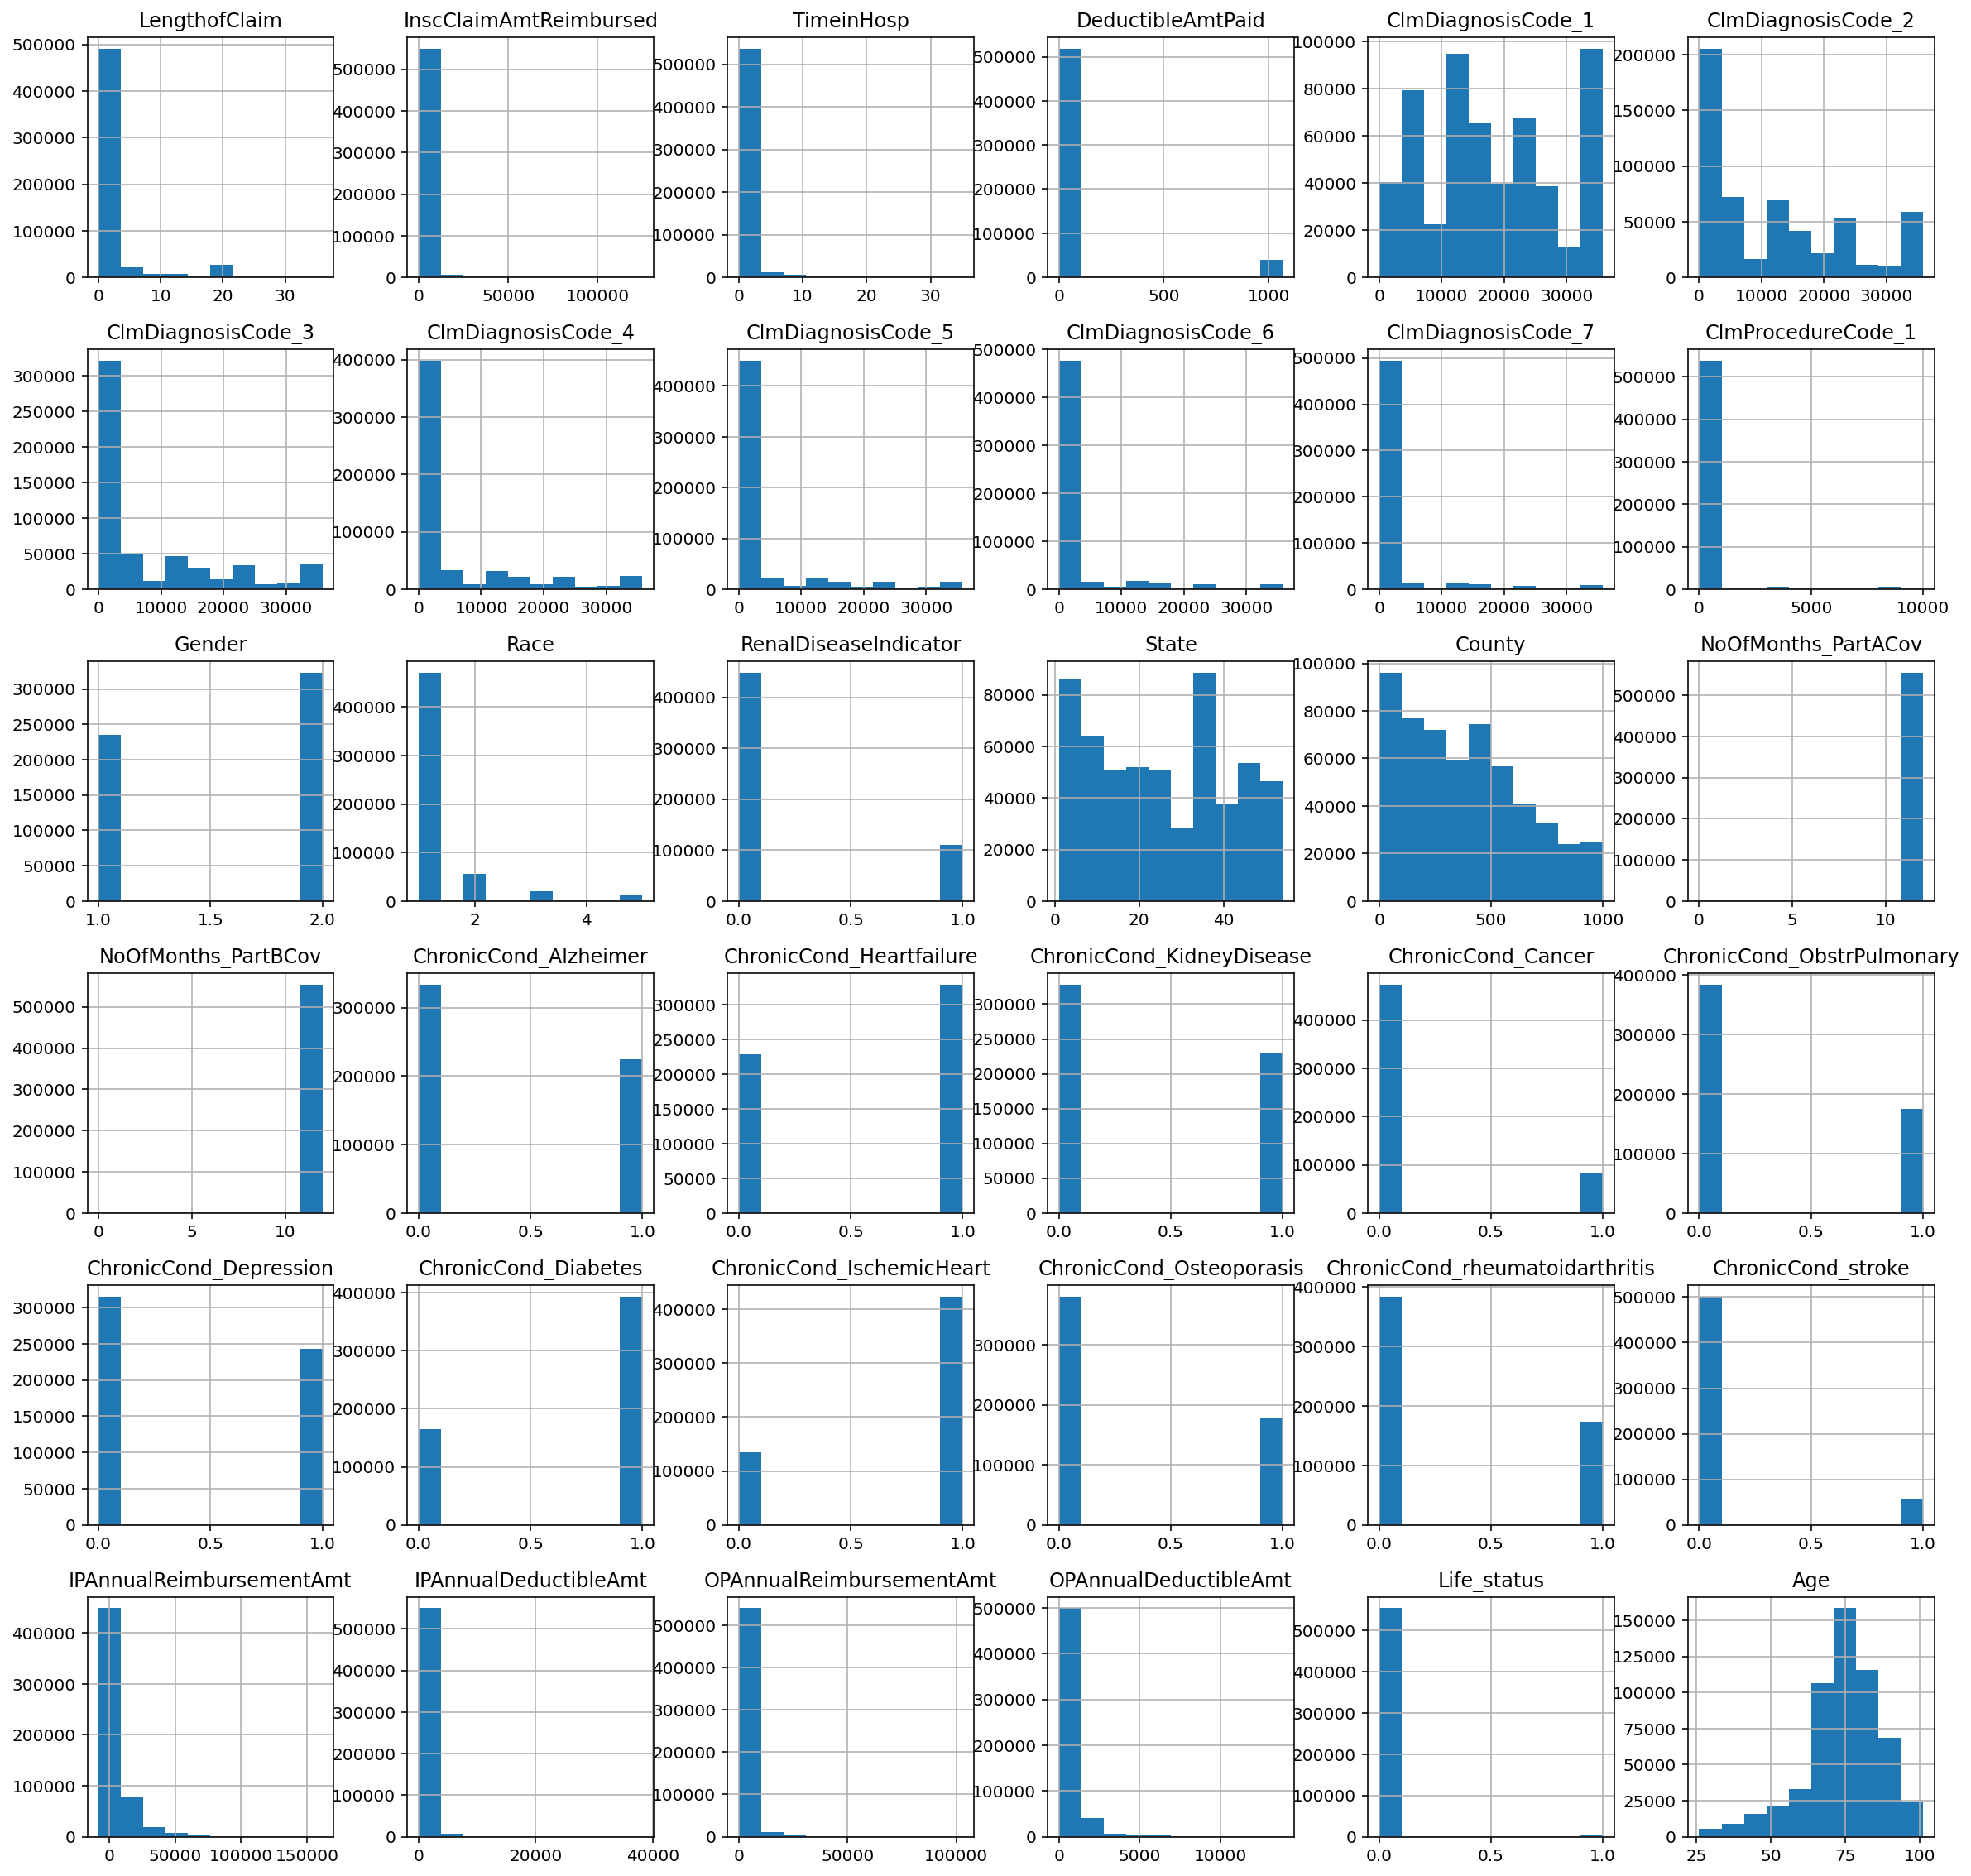

In [ ]:
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["font.size"] = 10
%config InlineBackend.figure_format = 'retina'
train_patient_final.hist()

####Visualising trends in Data

Text(0, 0.5, 'No.of PotentialFraud Cases ')

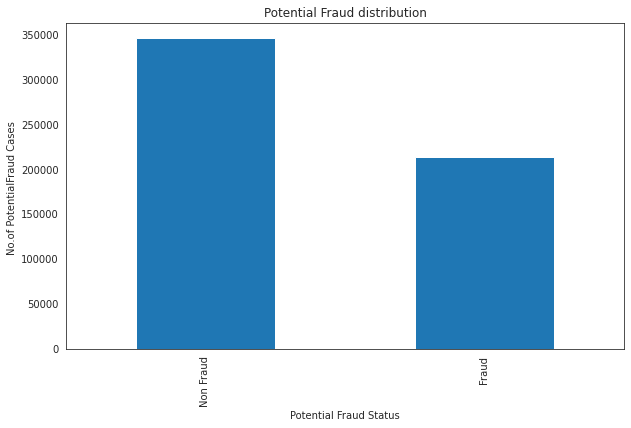

In [ ]:
fraud_df = pd.value_counts(train_patient_final['PotentialFraud'], sort = True)
LABELS = ["Non Fraud", "Fraud"]
fraud_df.plot(kind = 'bar',figsize=(10,6))
plt.title("Potential Fraud distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Status")
plt.ylabel("No.of PotentialFraud Cases ")

Text(0.5, 1.0, 'Fradulent Transactions w.r.t Age groups')

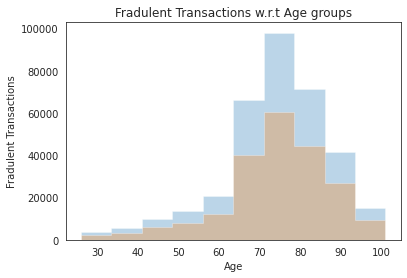

In [ ]:
x = train_patient_final[train_patient_final.PotentialFraud == True].Age
x1 =train_patient_final[train_patient_final.PotentialFraud == False].Age
kwargs = dict(histtype='stepfilled', alpha=0.3,bins=10)
plt.hist(x1,**kwargs)
plt.hist(x,**kwargs)
plt.xlabel('Age')
plt.ylabel('Fradulent Transactions')
plt.title("Fradulent Transactions w.r.t Age groups")

In [ ]:
df_ip_reimburse = train_patient_final[train_patient_final.IPAnnualReimbursementAmt-train_patient_final.IPAnnualDeductibleAmt>0][['Provider','PotentialFraud','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt']]
df_op_reimburse =train_patient_final[train_patient_final.OPAnnualReimbursementAmt-train_patient_final.OPAnnualDeductibleAmt>0][['Provider','PotentialFraud','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt']]
df_ip_reimburse['IP_Reimbursement_Difference'] = df_ip_reimburse['IPAnnualReimbursementAmt']-df_ip_reimburse['IPAnnualDeductibleAmt']
df_op_reimburse['OP_Reimbursement_Difference']= df_op_reimburse['OPAnnualReimbursementAmt']-df_op_reimburse['OPAnnualDeductibleAmt']

In [ ]:
df_ip_reimburse[['Provider','IP_Reimbursement_Difference']].value_counts()

Provider  IP_Reimbursement_Difference
PRV51459  3932                           142
          4932                           106
          5932                            84
PRV51574  3932                            81
PRV51459  2932                            81
                                        ... 
PRV53489  11932                            1
          6932                             1
          1932                             1
PRV53487  5232                             1
PRV57763  55932                            1
Length: 92074, dtype: int64

In [ ]:
df_op_reimburse[['Provider','OP_Reimbursement_Difference']].value_counts()

Provider  OP_Reimbursement_Difference
PRV51459  100                            80
          60                             77
          150                            76
          40                             74
          260                            73
                                         ..
PRV53694  3600                            1
          3790                            1
          3960                            1
          4540                            1
PRV57763  24570                           1
Length: 222021, dtype: int64

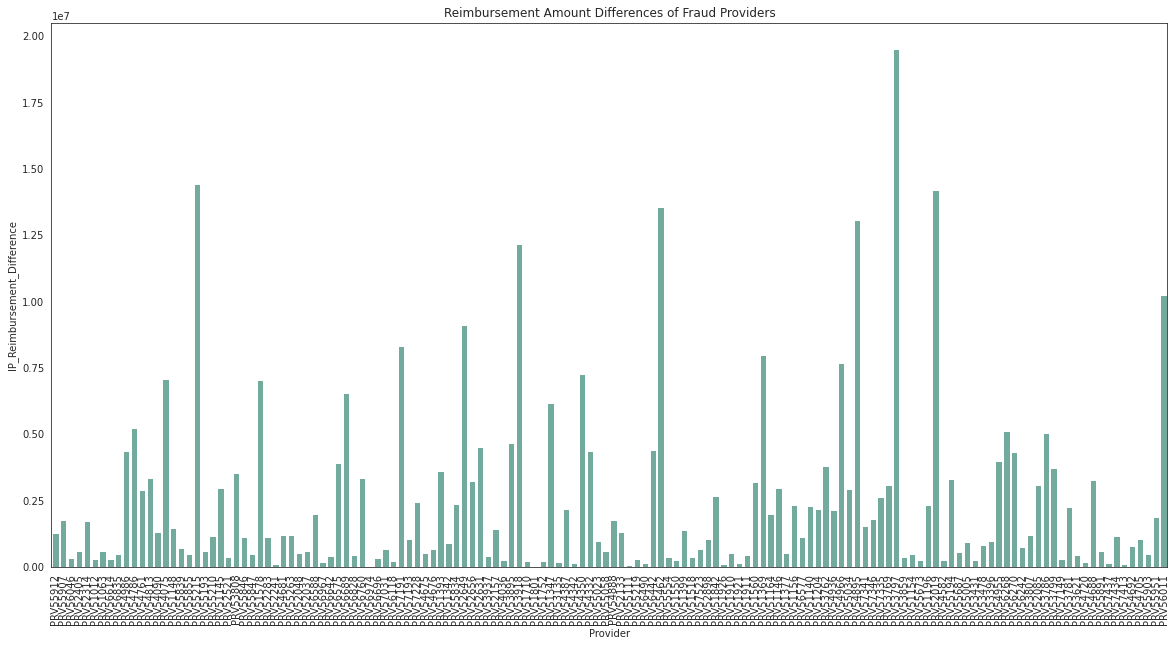

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    x="Provider", 
    y="IP_Reimbursement_Difference", 
    data=df_ip_reimburse[:25000], 
    estimator=sum, 
    ci=None,
    color='#69b3a2').set(title='Reimbursement Amount Differences of Fraud Providers')
plt.xticks(rotation=90)
plt.show()

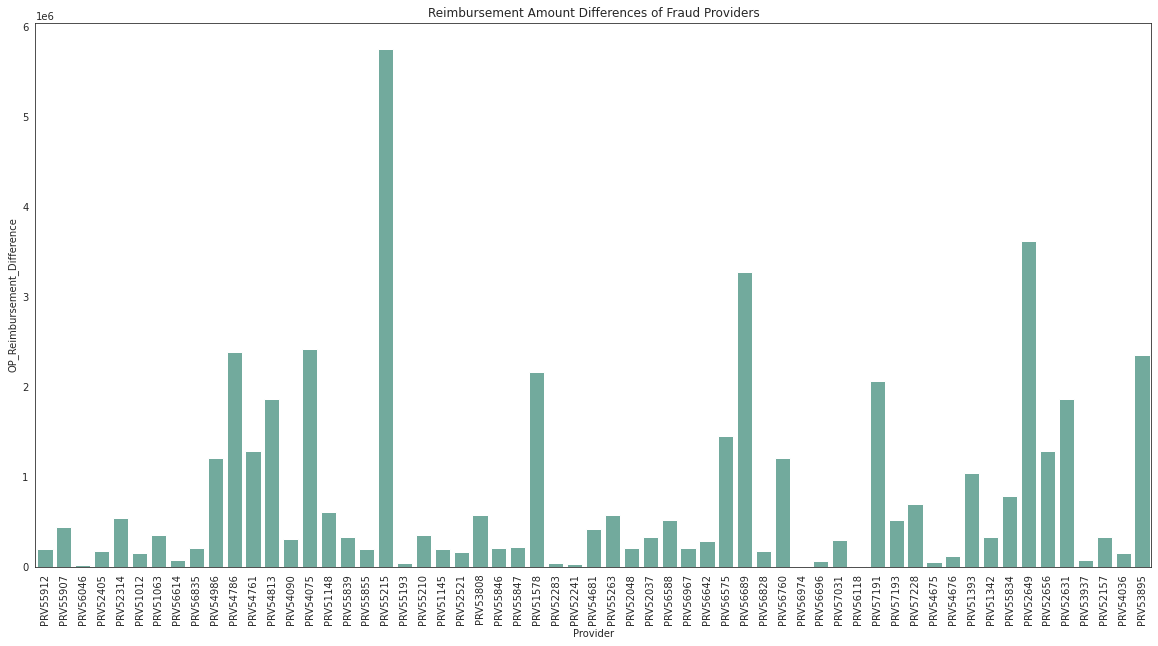

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(
    x="Provider", 
    y="OP_Reimbursement_Difference", 
    data=df_op_reimburse[:25000], 
    estimator=sum, 
    ci=None,
    color='#69b3a2').set(title='Reimbursement Amount Differences of Fraud Providers')
plt.xticks(rotation=90)
plt.show()

## Feature Selection 

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
# remove provider as unfair information to train on
train_patient_final = train_patient_final.drop([ "Provider"], axis='columns')

In [ ]:
# source : tutorial 
label_column_name = train_patient_final.filter(like="PotentialFraud").columns
K_features = 15

X_df = train_patient_final.drop(label_column_name, axis=1)
y = train_patient_final[label_column_name].to_numpy().ravel()

ft_scorer = SelectKBest(mutual_info_classif, k=K_features)
X = ft_scorer.fit_transform(X_df, y)

print("The input and the target matrix shapes:", X.shape, y.shape)

The input and the target matrix shapes: (558211, 15) (558211,)


In [ ]:
pd.Series(ft_scorer.scores_*1000, index=X_df.columns).sort_values(ascending=False)[:K_features]

NoOfMonths_PartBCov          65.373504
NoOfMonths_PartACov          64.846032
State                        43.314743
Race                         43.078798
ChronicCond_IschemicHeart    42.105707
County                       40.685360
Gender                       39.070276
ChronicCond_Diabetes         36.625543
ChronicCond_Heartfailure     25.434923
ChronicCond_Depression       13.699817
DeductibleAmtPaid            13.392301
ChronicCond_KidneyDisease    12.835621
IPAnnualDeductibleAmt        11.955284
ChronicCond_Alzheimer        11.834695
OPAnnualReimbursementAmt      7.863347
dtype: float64

In [ ]:
selected_feats = pd.Series(ft_scorer.scores_*1000, index=X_df.columns).sort_values(ascending=False)[:K_features].index

#### Model building: 


Functions 

In [ ]:
# code source: tutorial 

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        scoring="accuracy",
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    return plt


In [ ]:
# code from the other notebook to compare
def eval(y_test, y_pred): 
  cm1 = confusion_matrix(y_test, y_pred)
  print('Confusion Matrix Val: \n', cm1)

  total1=sum(sum(cm1))

  accuracy1=(cm1[0,0]+cm1[1,1])/total1
  print ('Accuracy Val: ', accuracy1)


  sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print('Sensitivity Val: ', sensitivity1 )


  specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  print('Specificity Val: ', specificity1)


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# to do organize imports 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,f1_score,auc

In [ ]:
# ML and data imports
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [ ]:
X = train_patient_final[selected_feats]
y = train_patient_final["PotentialFraud"]

In [ ]:
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=8)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
n_jobs = -1

Decision tree classifier 

In [ ]:
params = {'max_depth': [15, 18, 22], 
          'max_features': [3, 8, 15]}
gs = GridSearchCV(estimator=DecisionTreeClassifier(), 
                 param_grid=params, 
                 cv=cv,  
                 verbose=1, 
                 scoring='accuracy', 
                 n_jobs=n_jobs) 
gs.fit(X_train, y_train)
print(gs.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 18, 'max_features': 15}


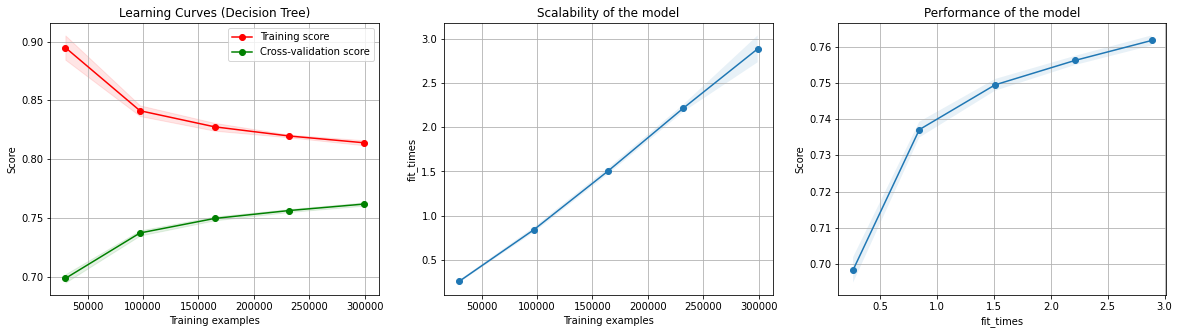

In [ ]:
title = "Learning Curves (Decision Tree)"
estimator = DecisionTreeClassifier(max_depth=18, max_features=15)

plot_learning_curve(
    estimator, title, X_train, y_train, cv=cv, n_jobs=n_jobs
)

plt.show()

In [ ]:
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
eval(y_test, y_pred)
print(classification_report(y_test, y_pred))

Confusion Matrix Val: 
 [[95714 18591]
 [25667 44238]]
Accuracy Val:  0.7597415992617121
Sensitivity Val:  0.837356196141901
Specificity Val:  0.6328302696516701
              precision    recall  f1-score   support

       False       0.79      0.84      0.81    114305
        True       0.70      0.63      0.67     69905

    accuracy                           0.76    184210
   macro avg       0.75      0.74      0.74    184210
weighted avg       0.76      0.76      0.76    184210



XGBoost Model 

In [ ]:
cv2 = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

params = {'max_depth': [5, 10, 15]}
gs = GridSearchCV(estimator=XGBClassifier(), 
                 param_grid=params, 
                 cv=cv2,  
                 verbose=1, 
                 scoring='accuracy', 
                n_jobs=n_jobs) 
gs.fit(X_train, y_train); 
print(gs.best_params_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
{'max_depth': 15}


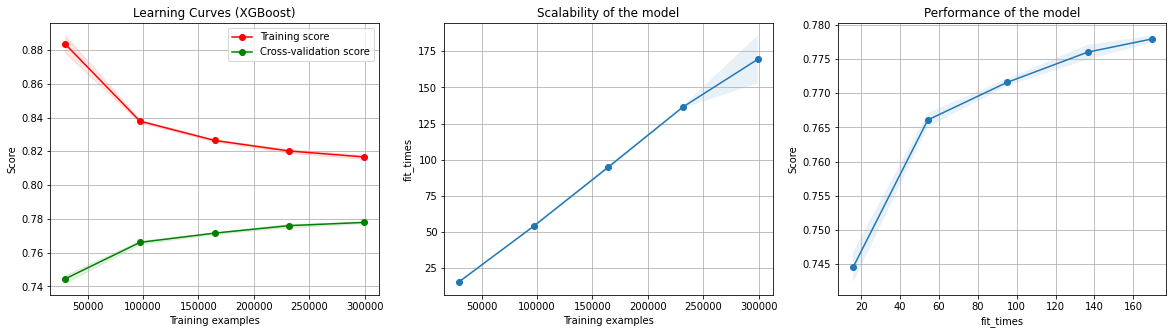

In [ ]:
title = "Learning Curves (XGBoost)"
model = XGBClassifier(max_depth=15)
plot_learning_curve(
    model, title, X_train, y_train, cv=cv, n_jobs=n_jobs
)

plt.show()

In [ ]:
model.fit(X_train, y_train,)
y_pred = model.predict(X_test)
eval(y_test, y_pred)
print(classification_report(y_test, y_pred))

Confusion Matrix Val: 
 [[97789 16516]
 [24642 45263]]
Accuracy Val:  0.7765702187720537
Sensitivity Val:  0.8555093827916539
Specificity Val:  0.6474930262499106
              precision    recall  f1-score   support

       False       0.80      0.86      0.83    114305
        True       0.73      0.65      0.69     69905

    accuracy                           0.78    184210
   macro avg       0.77      0.75      0.76    184210
weighted avg       0.77      0.78      0.77    184210



Bagging classifier 

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
param_grid = {
    'n_estimators' : [ 5, 7, 10]
}

gs = GridSearchCV(BaggingClassifier(),
                   param_grid,
                   cv=cv,  
                   verbose=1, 
                   scoring='accuracy', 
                   n_jobs=n_jobs)

gs.fit(X_train, y_train); 
print(gs.best_params_) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'n_estimators': 10}


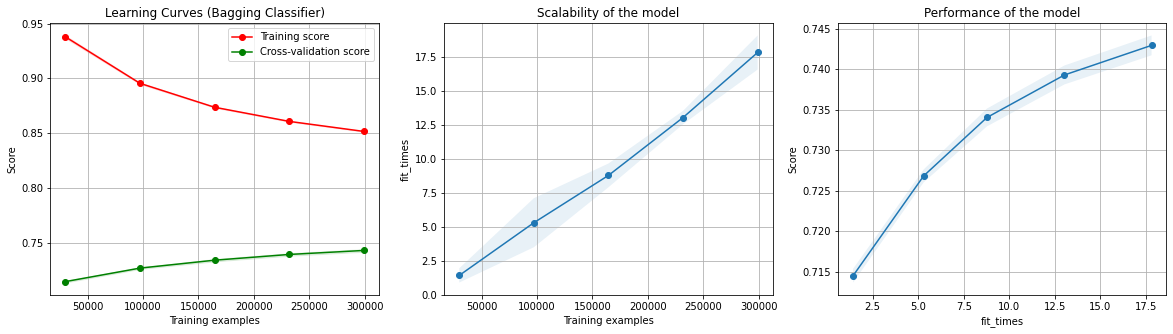

In [ ]:
title = "Learning Curves (Bagging Classifier)"
model = BaggingClassifier(n_estimators=10)
plot_learning_curve(
    model, title, X_train, y_train, cv=cv, n_jobs=n_jobs
)

plt.show()

In [ ]:
model.fit(X_train, y_train,)
y_pred = model.predict(X_test)
eval(y_test, y_pred)
print(classification_report(y_test, y_pred))

Confusion Matrix Val: 
 [[92468 21837]
 [27508 42397]]
Accuracy Val:  0.7321263775039357
Sensitivity Val:  0.808958488255107
Specificity Val:  0.6064945282883913
              precision    recall  f1-score   support

       False       0.77      0.81      0.79    114305
        True       0.66      0.61      0.63     69905

    accuracy                           0.73    184210
   macro avg       0.72      0.71      0.71    184210
weighted avg       0.73      0.73      0.73    184210



Stacking models 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

In [ ]:
#code source: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

models = dict()
models['lr'] = LogisticRegression()
models['knn'] = KNeighborsClassifier()
models['cart'] = DecisionTreeClassifier()
#models['svm'] = SVC()
models['bayes'] = GaussianNB()

for name, model in models.items():
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=n_jobs, error_score='raise')
  print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>lr 0.631 (0.001)
>knn 0.743 (0.000)
>cart 0.742 (0.001)
>bayes 0.626 (0.001)


In [ ]:
#code source: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
#level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


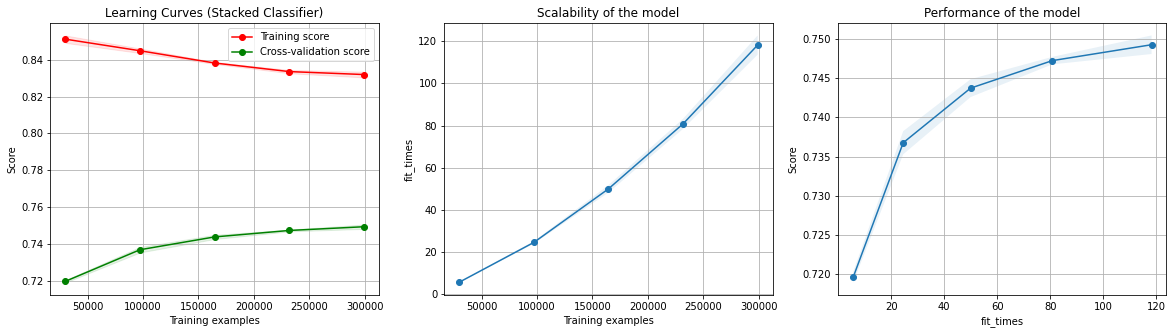

In [ ]:
title = "Learning Curves (Stacked Classifier)"
plot_learning_curve(
    model, title, X_train, y_train, cv=cv, n_jobs=n_jobs
)

plt.show()

In [ ]:
model.fit(X_train, y_train,)
y_pred = model.predict(X_test)
eval(y_test, y_pred)
print(classification_report(y_test, y_pred))

Confusion Matrix Val: 
 [[94025 20280]
 [31495 38410]]
Accuracy Val:  0.7189349112426036
Sensitivity Val:  0.8225799396351866
Specificity Val:  0.5494599814033331
              precision    recall  f1-score   support

       False       0.75      0.82      0.78    114305
        True       0.65      0.55      0.60     69905

    accuracy                           0.72    184210
   macro avg       0.70      0.69      0.69    184210
weighted avg       0.71      0.72      0.71    184210



As we can see the f1-score( the weighted average of Precison and Recall) of the XG Boost Classifier is
0.78 which is greater than other Classifiers. And also
the model has higher Precision rate which indicates less number of false positives predicted and
Recall (True Positive rate) is also greater for XG Boost Classifier. Hence we can consider XG boost
Classifier as the best suitable model. Considering the accuracy of XG Boost, which is 78%, we choose this model to best suited for the problem statement and can also be implemented for further classification on this datasets.